In [1]:
from pylab import plt
import pandas as pd
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import datetime as dt
import scipy as sc
from pylab import mpl
import scipy.integrate as sci
import scipy.stats as scs
import pandas_datareader as web
import statsmodels.api as sm
import enum
import scipy.optimize as spo
from numpy.fft import *
from yahoo_fin import options
from dawp import *
from mystic.solvers import fmin, fmin_powell, diffev, diffev2, sparsity,lattice

import datetime as dt
import numpy as np
import simpleplotly as spt
from fftoptionlib import *
import plotly
import plotly.offline as py
from scipy.stats import norm
import pandas as pd


import math
import sys
import yfinance as yf
np.set_printoptions(suppress=True, formatter={'all': lambda x: '%5.4f' % x})
aapl = yf.Ticker("NFLX")
sys.path.append('../')
sys.path.append('C:/Users/kiedy/dx')
print(sys.path)

import autograd.numpy as agnp
from autograd import grad


['C:\\Users\\kiedy', 'C:\\Users\\kiedy\\anaconda3\\python38.zip', 'C:\\Users\\kiedy\\anaconda3\\DLLs', 'C:\\Users\\kiedy\\anaconda3\\lib', 'C:\\Users\\kiedy\\anaconda3', '', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\kiedy\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\kiedy\\.ipython', '../', 'C:/Users/kiedy/dx']


In [2]:
options1=pd.DataFrame([43.10, 35.60, 22.90, 20.20, 13.30],
                     columns=['price'])
options1['strike']=(1090,1100,1120,1125,1140)
options1['maturity']=dt.datetime(2002,5,17)
options1['T_2']=0.088


options2=pd.DataFrame([84.50, 64.30, 39.50, 33.50, 30.70, 28.00,  25.60, 23.20,19.10,15.30,12.10,10.90],
                     columns=['price'])
options2['strike']=(1050,1075,1110,1120,1125,1130,1135,1140,1150,1160,1170,1175)
options2['maturity']=dt.datetime(2002,6,21)
options2['T_2']=0.184


options3=pd.DataFrame([161.60, 144.80, 120.10, 100.70, 82.50,65.50,51.00,45.50,38.10,27.70,19.60,13.20],
                     columns=['price'])
options3['strike']=(975,995,1025,1050,1075,1100,1125,1135,1150,1175,1200,1225)
options3['maturity']=dt.datetime(2002,9,20)
options3['T_2']=0.436



options4=pd.DataFrame([173.30,157.00,133.10,114.80,97.60,81.20,66.90,58.90,53.90,42.50,33.00,24.90,18.30,13.20],
                     columns=['price'])
options4['strike']=(975,995,1025,1050,1075,1100,1125,1140,1150,1175,1200,1225,1250,1275)
options4['maturity']=dt.datetime(2002,12,20)
options4['T_2']=0.692


options5=pd.DataFrame([146.50,96.20,81.70,68.30,56.60,46.10,36.90,29.30,22.50,17.20,12.80],
                     columns=['price'])
options5['strike']=(1025,1100,1125,1150,1175,1200,1225,1250,1275,1300,1325)
options5['maturity']=dt.datetime(2003,3,21)
options5['T_2']=0.936


options6=pd.DataFrame([182.10,143.00,111.30,97.00,83.30,60.90,49.80,41.20,27.10,17.10,10.10],
                     columns=['price'])
options6['strike']=(995,1050,1100,1125,1150,1200,1225,1250,1300,1350,1400)
options6['maturity']=dt.datetime(2003,6,20)
options6['T_2']=1.192

options7=pd.DataFrame([171.40,140.40,112.80,99.80,66.90,49.50,35.70,25.20,17.00,12.20],
                     columns=['price'])
options7['strike']=(1050,1100,1150,1175,1250,1300,1350,1400,1450,1500)
options7['maturity']=dt.datetime(2003,12,19)
options7['T_2']=1.708

frames=[options1, options2, options3, options4, options5, options6, options7]

options=pd.concat(frames, ignore_index=True)
options['pricing_date'] = dt.datetime(2002, 4, 18)
options['T']=(options['maturity']-options['pricing_date']).dt.days/365.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


r=0.019
q=0.012
S0=1124.47
i = np.complex(0.0, 1.0)

In [3]:
def CIR(u,T,y0,kappa,eta, lamb):
    gamma=np.sqrt(kappa**2 - 2*lamb**2*1j*u)
    A=np.exp(kappa**2*eta*T/lamb**2)/(np.cosh(gamma*T/2)+kappa/gamma*np.sinh(gamma*T/2))**(2*kappa*eta/lamb**2)
    B=2*1j*u/(kappa+gamma*np.cosh(gamma*T/2)/np.sinh(gamma*T/2))
    return A*np.exp(B*y0)

In [4]:
def Psi(u, T, r, theta, beta, sigma):
    ''' Funkcja charakterystyczna w modelu CGMY '''
    value = (-1/beta)*np.log(1-i*u*theta*beta+0.5*sigma**2*beta*u**2)
    return value

In [5]:
def cf(u, T, r, y0, theta, beta, sigma,kappa,eta, lamb):
    return np.exp(u*1j*T*(r-q))*CIR(-1j*Psi(u, T, r, theta, beta, sigma),T, y0, kappa,eta, lamb)/CIR(-1j*Psi(-1j, T, r, theta, beta, sigma),T, y0, kappa,eta, lamb)**(1j*u)

In [6]:
def G(u):
    return np.log(np.exp(u*T*(r-q))*CIR(-1j*Psi(-1j*u, T, r, theta, beta, sigma),T,1, kappa,eta, lamb)/CIR(-1j*Psi(-1j, T, r, theta, beta, sigma),T, 1, kappa,eta, lamb)**(u))

In [7]:
# def MGF(u, T, theta, beta, sigma, kappa, eta, lamb):
#     psi1=(-1/beta)*agnp.log(1+u*theta*beta-0.5*sigma**2*beta*u**2)
#     psi2=(-1/beta)*agnp.log(1+theta*beta-0.5*sigma**2*beta)
#     gamma1=agnp.sqrt(kappa**2 - 2*lamb**2*psi1)
#     gamma2=agnp.sqrt(kappa**2 - 2*lamb**2*psi2)
#     A1=agnp.exp(kappa**2*eta*T/lamb**2)/(agnp.cosh(gamma1*T/2)+kappa/gamma1*agnp.sinh(gamma1*T/2))**(2*kappa*eta/lamb**2)
#     B1=2*psi1/(kappa+gamma1*agnp.cosh(gamma1*T/2)/agnp.sinh(gamma1*T/2))
#     CIR1=A1*agnp.exp(B1*(1/beta))
#     A2=agnp.exp(kappa**2*eta*T/lamb**2)/(agnp.cosh(gamma2*T/2)+kappa/gamma2*agnp.sinh(gamma2*T/2))**(2*kappa*eta/lamb**2)
#     B2=2*psi2/(kappa+gamma2*agnp.cosh(gamma2*T/2)/agnp.sinh(gamma2*T/2))
#     CIR2=A2*agnp.exp(B2*(1/beta))
    
#     value=agnp.exp(u*T*(r-q))*CIR1/CIR2**u

#     return agnp.log(value)

In [8]:
# grad_g=grad(MGF,argnum=0)
# grad_g2=grad(grad_g,argnum=0)
# grad_g3=grad(grad_g2, argnum=0)
# grad_g4=grad(grad_g3,argnum=0)

# theta=0.4
# beta=1.
# sigma=0.2
# kappa=1.
# eta=1.
# lamb=1.
# T=1.
# r=0.05
# q=0.04

# # grad_g4(0., T, theta, beta, sigma, kappa, eta, lamb)

In [9]:
def MGF(u, T, theta, beta, sigma, kappa, eta, lamb):
    return agnp.log(((0.707106781186547*kappa*agnp.sinh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta))/agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta) + agnp.cosh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta)))**(-2*eta*kappa/lamb**2)*agnp.exp(-2.0*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/(beta**2*(kappa + 1.4142135623731*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta)*agnp.cosh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta))/agnp.sinh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2 - 1.0*beta*theta + 1)/beta)))))*agnp.exp(T*eta*kappa**2/lamb**2))**(-1.0*u)*(0.707106781186547*kappa*agnp.sinh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta))/agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta) + agnp.cosh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta)))**(-2*eta*kappa/lamb**2)*agnp.exp(1.0*T*u*(-q + r))*agnp.exp(-2.0*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/(beta**2*(kappa + 1.4142135623731*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta)*agnp.cosh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta))/agnp.sinh(0.707106781186548*T*agnp.sqrt(0.5*kappa**2 + lamb**2*agnp.log(-0.5*beta*sigma**2*u**2 - 1.0*beta*theta*u + 1)/beta)))))*agnp.exp(T*eta*kappa**2/lamb**2))

 
grad_g=grad(MGF,argnum=0)
grad_g2=grad(grad_g,argnum=0)
grad_g3=grad(grad_g2, argnum=0)
grad_g4=grad(grad_g3,argnum=0)

theta=0.4
beta=1.
sigma=0.2
kappa=1.
eta=1.
lamb=1.
T=1.

# grad_g(0., T, theta, beta, sigma, kappa, eta, lamb)

In [10]:
# This class defines puts and calls

N=2**12
L=10
h=1e-3
y0=1

# This class defines puts and calls

class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma,kappa, eta, lamb,N,L):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T  - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    # Assigning i=sqrt(-1)
    
    x0 = np.log(S0 / K)   
    
    # Truncation domain

#     a = 0.0 - L * np.sqrt(T)
#     b = 0.0 + L * np.sqrt(T)
    
#     w=(1/beta)*np.log(1-theta*beta-0.5*sigma**2*beta)
#     c1=np.log(S0/K)+T*(r-q-w+theta)
#     c2=(sigma**2+beta*theta**2)*T
#     c4=3*T*(sigma**4*beta+2*theta**4*beta**3+4*sigma**2*theta**2*beta**2)
    c1=(G(h)-G(-h))/(2*h)
    c2=(G(h)-2*G(0)+G(-h))/(h**2)
    c4=(G(3*h)-2*G(2*h)+4*G(0)-G(h)-G(-h)-2*G(-2*h)+G(-3*h))/(4*h**4)

#     c1=grad_g(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c2=grad_g2(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c4=grad_g4(0., T, theta, beta, sigma, kappa, eta, lamb)
    a=c1+x0-L*np.sqrt(c2+np.sqrt(c4))
    b=c1+x0+L*np.sqrt(c2+np.sqrt(c4))
#     Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u, T, r, y0, theta, beta, sigma,kappa,eta, lamb) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))     
    return np.exp(-q*T)*S0+ value - K*np.exp(-r*T)

# Determine coefficients for put prices 

def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k  = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [13]:
# Dane:
theta = -0.1251
nu = 0.0809
sigma = 0.1613
kappa = 0.6199
eta = 1.5650
lam = 2.0362

T = 1
K = 1100
CallPutOptionPriceCOSMthd(cf,OptionType.PUT,S0,r,T,(K,),theta,beta, sigma,kappa, eta, lamb,N,L)

array([[103.3265]])

In [49]:
m=0
def VG_error_function(p0):
    
    global m
    theta, beta, sigma, kappa, eta, lamb=p0
    se = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,OptionType.PUT,S0,r,option['T_2'],(option['strike'],),theta, beta, sigma,kappa,eta,lamb,N,L)[0][0]
        if np.isnan(model_value):
            model_value=np.inf
        se.append((model_value - option['price']) ** 2)
    RMSE = (sum(se) / len(se))**0.5
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE
VG_error_function((-0.1252, 0.0821, 0.1614, 0.6112, 1.5679, 2.0253))
VG_error_function((-0.106, 0.061, 0.161, 0.496, 2.130, 2.515))


   0 | [-0.1252 0.0821 0.1614 0.6112 1.5679 2.0253] |   0.506
   1 | [-0.1060 0.0610 0.1610 0.4960 2.1300 2.5150] |   1.068


1.067730014154415

In [50]:
def VG_calibration_full():
    i=0
    global opt
    p0 = spo.brute(VG_error_function, ((-0.5,0.2,0.19),(0.001,0.5, 0.1), (0.001,0.21, 0.1),(0.1,1,0.2),(0.1,2,0.4),(0.1,3.3,1)), finish=None)
    opt = spo.fmin(VG_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=15000, maxfun=15000)
    return opt

# VG_calibration_full()

# Kalibracja z ustalonym eta

In [12]:
# This class defines puts and calls

N=2**12
L=10
h=1e-3
eta=1

# This class defines puts and calls

class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma,kappa, eta, lamb,y0,N,L):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T    - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    # Assigning i=sqrt(-1)
    
    x0 = np.log(S0 / K)   
    
    # Truncation domain

#     a = 0.0 - L * np.sqrt(T)
#     b = 0.0 + L * np.sqrt(T)
    
#     w=(1/beta)*np.log(1-theta*beta-0.5*sigma**2*beta)
#     c1=np.log(S0/K)+T*(r-q-w+theta)
#     c2=(sigma**2+beta*theta**2)*T
#     c4=3*T*(sigma**4*beta+2*theta**4*beta**3+4*sigma**2*theta**2*beta**2)
    c1=(G(h)-G(-h))/(2*h)
    c2=(G(h)-2*G(0)+G(-h))/(h**2)
    c4=(G(3*h)-2*G(2*h)+4*G(0)-G(h)-G(-h)-2*G(-2*h)+G(-3*h))/(4*h**4)

#     c1=grad_g(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c2=grad_g2(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c4=grad_g4(0., T, theta, beta, sigma, kappa, eta, lamb)
    a=c1+x0-L*np.sqrt(c2+np.sqrt(c4))
    b=c1+x0+L*np.sqrt(c2+np.sqrt(c4))
#     Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u, T, r,y0, theta, beta, sigma,kappa,eta, lamb) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))     
    return np.exp(-q*T)*S0+ value - K*np.exp(-r*T)

# Determine coefficients for put prices 

def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k  = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [13]:
m=0
def VG_error_function(p0):
    
    global m
    theta, beta, sigma, kappa, lamb, y0=p0
    se = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,OptionType.PUT,S0,r,option['T_2'],(option['strike'],),theta, beta, sigma,kappa,eta,lamb,y0,N,L)[0][0]
        if np.isnan(model_value):
            model_value=np.inf
        se.append((model_value - option['price']) ** 2)
    RMSE = (sum(se) / len(se))**0.5
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE
VG_error_function((-0.1252, 0.0821, 0.1614, 0.6112, 1.5679, 2.0253))
VG_error_function((-0.106, 0.061, 0.161, 0.496, 2.130, 2.515))


   0 | [-0.125 0.082 0.161 0.611 1.568 2.025] |  16.888
   1 | [-0.106 0.061 0.161 0.496 2.130 2.515] |  25.479


25.4789445071888

In [34]:
def VG_calibration_full():
    i=0
    global opt
    p0 = spo.brute(VG_error_function, ((-0.3,0.0,0.19),(0.001,0.5, 0.3), (0.001,0.21, 0.1),(0.1,1,0.5),(0.1,3.3,2), (0.1,3,2)), finish=None)
    opt = spo.fmin(VG_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=15000, maxfun=15000)
    return opt

# VG_calibration_full()

# Wykres

In [160]:
def VGCIR_calculate_model_values(p0):
    ''' Calculates all model values given parameter vector p0. '''
  
    theta, beta, sigma, kappa, eta, lamb = p0
    values = []
    for row, option in options.iterrows():
        model_value = CallPutOptionPriceCOSMthd(cf,OptionType.PUT,S0,r,option['T_2'],(option['strike'],),theta,beta, sigma,kappa, eta, lamb,N,L)
        values.append(model_value)
    return np.array(values)


In [166]:
VGCIR_model_value=VGCIR_calculate_model_values(opt)
VGCIR_model_value=VGCIR_model_value.reshape([len(VGCIR_model_value),1])
VGCIR_model_value=pd.DataFrame(VGCIR_model_value)
VGCIR_model_value



,0
0,43.780915
1,36.084072
2,22.539424
3,19.648573
4,12.625031
5,84.037352
6,63.764852
7,39.142016
8,33.158555
9,30.374207


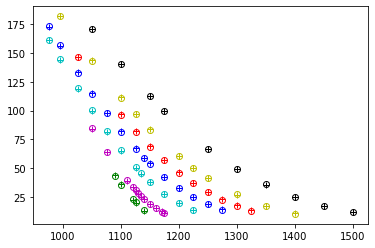

In [173]:
plt.plot(options1['strike'], options1['price'], 'go', fillstyle='none', label='cena rynkowa')
plt.plot(options1['strike'], VGCIR_model_value.iloc[0:5], 'g+', fillstyle='none', label='cena rynkowa')

plt.plot(options2['strike'], options2['price'], 'mo', fillstyle='none', label='cena rynkowa')
plt.plot(options2['strike'], VGCIR_model_value.iloc[5:17], 'm+', fillstyle='none', label='cena rynkowa')

plt.plot(options3['strike'], options3['price'], 'co', fillstyle='none', label='cena rynkowa')
plt.plot(options3['strike'], VGCIR_model_value.iloc[17:29], 'c+', fillstyle='none', label='cena rynkowa')


plt.plot(options4['strike'], options4['price'], 'bo', fillstyle='none', label='cena rynkowa')
plt.plot(options4['strike'], VGCIR_model_value.iloc[29:43], 'b+', fillstyle='none', label='cena rynkowa')

plt.plot(options5['strike'], options5['price'], 'ro', fillstyle='none', label='cena rynkowa')
plt.plot(options5['strike'], VGCIR_model_value.iloc[43:54], 'r+', fillstyle='none', label='cena rynkowa')

plt.plot(options6['strike'], options6['price'], 'yo', fillstyle='none', label='cena rynkowa')
plt.plot(options6['strike'], VGCIR_model_value.iloc[54:65], 'y+', fillstyle='none', label='cena rynkowa')

plt.plot(options7['strike'], options7['price'], 'ko', fillstyle='none', label='cena rynkowa')
plt.plot(options7['strike'], VGCIR_model_value.iloc[65:], 'k+', fillstyle='none', label='cena rynkowa')

In [51]:
# This class defines puts and calls

N=2**12
L=10

# This class defines puts and calls

class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
def CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma,kappa, eta, lamb,N,L):


    # cf   - Characteristic function is a function, in the book denoted by \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # r    - Interest rate (constant)
    # T  - Time to maturity
    # K    - List of strikes
    # N    - Number of expansion terms
    # L    - Size of truncation domain (typ.:L=8 or L=10)
        
    # Reshape K to become a column vector

    if K is not np.array:
        K = np.array(K).reshape([len(K),1])
    
    # Assigning i=sqrt(-1)
    
    x0 = np.log(S0 / K)   

    # kumulanty
    c1=(G(h)-G(-h))/(2*h)
    c2=(G(h)-2*G(0)+G(-h))/(h**2)
    c4=(G(3*h)-2*G(2*h)+4*G(0)-G(h)-G(-h)-2*G(-2*h)+G(-3*h))/(4*h**4)

#     c1=grad_g(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c2=grad_g2(0., T, theta, beta, sigma, kappa, eta, lamb)
#     c4=grad_g4(0., T, theta, beta, sigma, kappa, eta, lamb)
    a=c1-L*np.sqrt(c2+np.sqrt(c4))
    b=c1+L*np.sqrt(c2+np.sqrt(c4))
#     Summation from k = 0 to k=N-1

    k = np.linspace(0,N-1,N).reshape([N,1])  
    u = k * np.pi / (b - a);  

    # Determine coefficients for put prices  

    H_k = CallPutCoefficients(CP,a,b,k)   
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u, T, r, y0, theta, beta, sigma, kappa, eta, lamb) * H_k 
    temp[0] = 0.5 * temp[0]    
    value = np.exp(-r * T) * K * np.real(mat.dot(temp))     
    return np.exp(-q*T)*S0+ value - K*np.exp(-r*T)

# Determine coefficients for put prices 

def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:                  
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k      = 2.0 / (b - a) * (Chi_k - Psi_k)  
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k  = 2.0 / (b - a) * (- Chi_k + Psi_k)               
    
    return H_k    

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0)) 
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d)  - np.cos(k * np.pi 
                  * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * 
                        (d - a) / (b - a))   - k * np.pi / (b - a) * np.sin(k 
                        * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    
    value = {"chi":chi,"psi":psi }
    return value

In [52]:
m=0
def VG_error_function(p0):
    
    global m
    theta, beta, sigma, kappa,eta,lamb=p0
#     if sigma<=0:
#         return 100
    se1 = []
    CP=OptionType.PUT
    K = np.array(options1['strike'])
    T=options['T_2'][0]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options1.iterrows():
        se1.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se2 = []
    K = np.array(options2['strike'])
    T=options['T_2'][10]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options2.iterrows():
        se2.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se3 = []    
    K = np.array(options3['strike'])
    T=options['T_2'][18]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options3.iterrows():
        se3.append((model_value[i] - option['price']) ** 2)
        i+=1        
        
        
    se4 = []    
    K = np.array(options4['strike'])
    T=options['T_2'][37]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options4.iterrows():
        se4.append((model_value[i] - option['price']) ** 2)
        i+=1        

    se5 = []    
    K = np.array(options5['strike'])
    T=options['T_2'][48]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options5.iterrows():
        se5.append((model_value[i] - option['price']) ** 2)
        i+=1 
        
    se6 = []    
    K = np.array(options6['strike'])
    T=options['T_2'][58]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options6.iterrows():
        se6.append((model_value[i] - option['price']) ** 2)
        i+=1
        
        
    se7 = []    
    K = np.array(options7['strike'])
    T=options['T_2'][69]
    model_value=CallPutOptionPriceCOSMthd(cf,CP,S0,r,T,K,theta,beta, sigma, kappa,eta,lamb,N,L)
    i=0
    for row, option in options7.iterrows():
        se7.append((model_value[i] - option['price']) ** 2)
        i+=1
        
    RMSE = ((sum(se1)+sum(se2)+sum(se3)+sum(se4)+sum(se5)+sum(se6)+sum(se7)) / (len(se1)+len(se2)+len(se3)+len(se4)+len(se5)+len(se6)+len(se7)))**0.5
    if np.isnan(RMSE):
        RMSE=100
    if m % 1 == 0:
        print('%4d |' % m, np.array(p0), '| %7.3f' % RMSE)
        
    m += 1
    return RMSE

# def BS_calibration_full():
#     i=0
#     global opt
#     p0 = spo.brute(BS_error_function, ((0.07,0.4,0.1),), finish=None)
#     opt = spo.fmin(BS_error_function, p0, xtol=0.000001, ftol=0.000001, maxiter=None, maxfun=None)
#     return opt




In [53]:
%time VG_calibration_full()

   0 | [-0.5000 0.0010 0.0010 0.1000 0.1000 0.1000] |  41.426
   1 | [-0.5000 0.0010 0.0010 0.1000 0.1000 1.1000] |  41.526
   2 | [-0.5000 0.0010 0.0010 0.1000 0.1000 2.1000] |  63.343
   3 | [-0.5000 0.0010 0.0010 0.1000 0.1000 3.1000] |  57.958
   4 | [-0.5000 0.0010 0.0010 0.1000 0.5000 0.1000] |  41.382
   5 | [-0.5000 0.0010 0.0010 0.1000 0.5000 1.1000] |  42.584
   6 | [-0.5000 0.0010 0.0010 0.1000 0.5000 2.1000] |  65.362
   7 | [-0.5000 0.0010 0.0010 0.1000 0.5000 3.1000] |  60.139
   8 | [-0.5000 0.0010 0.0010 0.1000 0.9000 0.1000] |  41.339
   9 | [-0.5000 0.0010 0.0010 0.1000 0.9000 1.1000] |  43.629
  10 | [-0.5000 0.0010 0.0010 0.1000 0.9000 2.1000] |  67.348
  11 | [-0.5000 0.0010 0.0010 0.1000 0.9000 3.1000] |  62.363
  12 | [-0.5000 0.0010 0.0010 0.1000 1.3000 0.1000] |  41.296
  13 | [-0.5000 0.0010 0.0010 0.1000 1.3000 1.1000] |  44.660
  14 | [-0.5000 0.0010 0.0010 0.1000 1.3000 2.1000] |  69.293
  15 | [-0.5000 0.0010 0.0010 0.1000 1.3000 3.1000] |  64.626
  16 | [

 133 | [-0.5000 0.0010 0.1010 0.3000 1.3000 1.1000] |  40.930
 134 | [-0.5000 0.0010 0.1010 0.3000 1.3000 2.1000] |  69.571
 135 | [-0.5000 0.0010 0.1010 0.3000 1.3000 3.1000] |  70.979
 136 | [-0.5000 0.0010 0.1010 0.3000 1.7000 0.1000] |  23.412
 137 | [-0.5000 0.0010 0.1010 0.3000 1.7000 1.1000] |  43.780
 138 | [-0.5000 0.0010 0.1010 0.3000 1.7000 2.1000] |  74.240
 139 | [-0.5000 0.0010 0.1010 0.3000 1.7000 3.1000] |  77.428
 140 | [-0.5000 0.0010 0.1010 0.5000 0.1000 0.1000] |  28.296
 141 | [-0.5000 0.0010 0.1010 0.5000 0.1000 1.1000] |  22.017
 142 | [-0.5000 0.0010 0.1010 0.5000 0.1000 2.1000] |  44.671
 143 | [-0.5000 0.0010 0.1010 0.5000 0.1000 3.1000] |  45.800
 144 | [-0.5000 0.0010 0.1010 0.5000 0.5000 0.1000] |  26.849
 145 | [-0.5000 0.0010 0.1010 0.5000 0.5000 1.1000] |  26.727
 146 | [-0.5000 0.0010 0.1010 0.5000 0.5000 2.1000] |  52.776
 147 | [-0.5000 0.0010 0.1010 0.5000 0.5000 3.1000] |  55.297
 148 | [-0.5000 0.0010 0.1010 0.5000 0.9000 0.1000] |  25.457
 149 | [

<ipython-input-41-847f22996f3b>:3: RuntimeWarning:

overflow encountered in power

<ipython-input-41-847f22996f3b>:3: RuntimeWarning:

invalid value encountered in true_divide



 178 | [-0.5000 0.0010 0.1010 0.7000 1.7000 2.1000] |  72.645
 179 | [-0.5000 0.0010 0.1010 0.7000 1.7000 3.1000] |  88.396
 180 | [-0.5000 0.0010 0.1010 0.9000 0.1000 0.1000] |  30.443
 181 | [-0.5000 0.0010 0.1010 0.9000 0.1000 1.1000] |   7.892
 182 | [-0.5000 0.0010 0.1010 0.9000 0.1000 2.1000] |  29.328
 183 | [-0.5000 0.0010 0.1010 0.9000 0.1000 3.1000] |  34.954
 184 | [-0.5000 0.0010 0.1010 0.9000 0.5000 0.1000] |  28.114
 185 | [-0.5000 0.0010 0.1010 0.9000 0.5000 1.1000] |  14.011
 186 | [-0.5000 0.0010 0.1010 0.9000 0.5000 2.1000] |  40.678
 187 | [-0.5000 0.0010 0.1010 0.9000 0.5000 3.1000] |  49.453
 188 | [-0.5000 0.0010 0.1010 0.9000 0.9000 0.1000] |  25.924
 189 | [-0.5000 0.0010 0.1010 0.9000 0.9000 1.1000] |  20.247
 190 | [-0.5000 0.0010 0.1010 0.9000 0.9000 2.1000] |  51.058
 191 | [-0.5000 0.0010 0.1010 0.9000 0.9000 3.1000] |  64.949
 192 | [-0.5000 0.0010 0.1010 0.9000 1.3000 0.1000] | 100.000
 193 | [-0.5000 0.0010 0.1010 0.9000 1.3000 1.1000] |  26.148
 194 | [

<ipython-input-41-847f22996f3b>:3: RuntimeWarning:

overflow encountered in true_divide



 196 | [-0.5000 0.0010 0.1010 0.9000 1.7000 0.1000] | 100.000
 197 | [-0.5000 0.0010 0.1010 0.9000 1.7000 1.1000] |  31.709
 198 | [-0.5000 0.0010 0.1010 0.9000 1.7000 2.1000] |  70.702
 199 | [-0.5000 0.0010 0.1010 0.9000 1.7000 3.1000] |  89.640
 200 | [-0.5000 0.0010 0.2010 0.1000 0.1000 0.1000] |   9.214
 201 | [-0.5000 0.0010 0.2010 0.1000 0.1000 1.1000] |  52.214
 202 | [-0.5000 0.0010 0.2010 0.1000 0.1000 2.1000] |  68.904
 203 | [-0.5000 0.0010 0.2010 0.1000 0.1000 3.1000] |  61.900
 204 | [-0.5000 0.0010 0.2010 0.1000 0.5000 0.1000] |   9.638
 205 | [-0.5000 0.0010 0.2010 0.1000 0.5000 1.1000] |  53.581
 206 | [-0.5000 0.0010 0.2010 0.1000 0.5000 2.1000] |  70.977
 207 | [-0.5000 0.0010 0.2010 0.1000 0.5000 3.1000] |  64.076
 208 | [-0.5000 0.0010 0.2010 0.1000 0.9000 0.1000] |  10.107
 209 | [-0.5000 0.0010 0.2010 0.1000 0.9000 1.1000] |  54.931
 210 | [-0.5000 0.0010 0.2010 0.1000 0.9000 2.1000] |  73.024
 211 | [-0.5000 0.0010 0.2010 0.1000 0.9000 3.1000] |  66.293
 212 | [

 331 | [-0.5000 0.1010 0.0010 0.3000 0.9000 3.1000] |  66.066
 332 | [-0.5000 0.1010 0.0010 0.3000 1.3000 0.1000] |   9.332
 333 | [-0.5000 0.1010 0.0010 0.3000 1.3000 1.1000] |  45.446
 334 | [-0.5000 0.1010 0.0010 0.3000 1.3000 2.1000] |  71.797
 335 | [-0.5000 0.1010 0.0010 0.3000 1.3000 3.1000] |  72.596
 336 | [-0.5000 0.1010 0.0010 0.3000 1.7000 0.1000] |   7.901
 337 | [-0.5000 0.1010 0.0010 0.3000 1.7000 1.1000] |  48.581
 338 | [-0.5000 0.1010 0.0010 0.3000 1.7000 2.1000] |  76.697
 339 | [-0.5000 0.1010 0.0010 0.3000 1.7000 3.1000] |  79.062
 340 | [-0.5000 0.1010 0.0010 0.5000 0.1000 0.1000] |  16.251
 341 | [-0.5000 0.1010 0.0010 0.5000 0.1000 1.1000] |  25.666
 342 | [-0.5000 0.1010 0.0010 0.5000 0.1000 2.1000] |  46.888
 343 | [-0.5000 0.1010 0.0010 0.5000 0.1000 3.1000] |  47.346
 344 | [-0.5000 0.1010 0.0010 0.5000 0.5000 0.1000] |  13.659
 345 | [-0.5000 0.1010 0.0010 0.5000 0.5000 1.1000] |  30.957
 346 | [-0.5000 0.1010 0.0010 0.5000 0.5000 2.1000] |  55.025
 347 | [

 466 | [-0.5000 0.1010 0.1010 0.7000 0.5000 2.1000] |  50.895
 467 | [-0.5000 0.1010 0.1010 0.7000 0.5000 3.1000] |  55.058
 468 | [-0.5000 0.1010 0.1010 0.7000 0.9000 0.1000] |   4.995
 469 | [-0.5000 0.1010 0.1010 0.7000 0.9000 1.1000] |  34.674
 470 | [-0.5000 0.1010 0.1010 0.7000 0.9000 2.1000] |  60.888
 471 | [-0.5000 0.1010 0.1010 0.7000 0.9000 3.1000] |  67.912
 472 | [-0.5000 0.1010 0.1010 0.7000 1.3000 0.1000] |   4.620
 473 | [-0.5000 0.1010 0.1010 0.7000 1.3000 1.1000] |  40.974
 474 | [-0.5000 0.1010 0.1010 0.7000 1.3000 2.1000] |  70.475
 475 | [-0.5000 0.1010 0.1010 0.7000 1.3000 3.1000] |  79.933
 476 | [-0.5000 0.1010 0.1010 0.7000 1.7000 0.1000] |   6.842
 477 | [-0.5000 0.1010 0.1010 0.7000 1.7000 1.1000] |  46.915
 478 | [-0.5000 0.1010 0.1010 0.7000 1.7000 2.1000] |  79.506
 479 | [-0.5000 0.1010 0.1010 0.7000 1.7000 3.1000] |  90.611
 480 | [-0.5000 0.1010 0.1010 0.9000 0.1000 0.1000] |  13.776
 481 | [-0.5000 0.1010 0.1010 0.9000 0.1000 1.1000] |  14.268
 482 | [

 601 | [-0.5000 0.2010 0.0010 0.1000 0.1000 1.1000] |  52.834
 602 | [-0.5000 0.2010 0.0010 0.1000 0.1000 2.1000] |  69.471
 603 | [-0.5000 0.2010 0.0010 0.1000 0.1000 3.1000] |  62.511
 604 | [-0.5000 0.2010 0.0010 0.1000 0.5000 0.1000] |   8.822
 605 | [-0.5000 0.2010 0.0010 0.1000 0.5000 1.1000] |  54.244
 606 | [-0.5000 0.2010 0.0010 0.1000 0.5000 2.1000] |  71.556
 607 | [-0.5000 0.2010 0.0010 0.1000 0.5000 3.1000] |  64.695
 608 | [-0.5000 0.2010 0.0010 0.1000 0.9000 0.1000] |   9.465
 609 | [-0.5000 0.2010 0.0010 0.1000 0.9000 1.1000] |  55.635
 610 | [-0.5000 0.2010 0.0010 0.1000 0.9000 2.1000] |  73.625
 611 | [-0.5000 0.2010 0.0010 0.1000 0.9000 3.1000] |  66.926
 612 | [-0.5000 0.2010 0.0010 0.1000 1.3000 0.1000] |  10.141
 613 | [-0.5000 0.2010 0.0010 0.1000 1.3000 1.1000] |  57.008
 614 | [-0.5000 0.2010 0.0010 0.1000 1.3000 2.1000] |  75.675
 615 | [-0.5000 0.2010 0.0010 0.1000 1.3000 3.1000] |  69.196
 616 | [-0.5000 0.2010 0.0010 0.1000 1.7000 0.1000] |  10.841
 617 | [

 736 | [-0.5000 0.2010 0.1010 0.3000 1.7000 0.1000] |  20.102
 737 | [-0.5000 0.2010 0.1010 0.3000 1.7000 1.1000] |  59.959
 738 | [-0.5000 0.2010 0.1010 0.3000 1.7000 2.1000] |  82.927
 739 | [-0.5000 0.2010 0.1010 0.3000 1.7000 3.1000] |  82.250
 740 | [-0.5000 0.2010 0.1010 0.5000 0.1000 0.1000] |   9.264
 741 | [-0.5000 0.2010 0.1010 0.5000 0.1000 1.1000] |  35.353
 742 | [-0.5000 0.2010 0.1010 0.5000 0.1000 2.1000] |  52.030
 743 | [-0.5000 0.2010 0.1010 0.5000 0.1000 3.1000] |  50.865
 744 | [-0.5000 0.2010 0.1010 0.5000 0.5000 0.1000] |  11.766
 745 | [-0.5000 0.2010 0.1010 0.5000 0.5000 1.1000] |  41.578
 746 | [-0.5000 0.2010 0.1010 0.5000 0.5000 2.1000] |  60.672
 747 | [-0.5000 0.2010 0.1010 0.5000 0.5000 3.1000] |  60.289
 748 | [-0.5000 0.2010 0.1010 0.5000 0.9000 0.1000] |  15.078
 749 | [-0.5000 0.2010 0.1010 0.5000 0.9000 1.1000] |  47.493
 750 | [-0.5000 0.2010 0.1010 0.5000 0.9000 2.1000] |  69.056
 751 | [-0.5000 0.2010 0.1010 0.5000 0.9000 3.1000] |  70.160
 752 | [

 871 | [-0.5000 0.2010 0.2010 0.7000 0.9000 3.1000] |  73.093
 872 | [-0.5000 0.2010 0.2010 0.7000 1.3000 0.1000] |  38.247
 873 | [-0.5000 0.2010 0.2010 0.7000 1.3000 1.1000] |  62.016
 874 | [-0.5000 0.2010 0.2010 0.7000 1.3000 2.1000] |  82.426
 875 | [-0.5000 0.2010 0.2010 0.7000 1.3000 3.1000] |  84.896
 876 | [-0.5000 0.2010 0.2010 0.7000 1.7000 0.1000] |  44.135
 877 | [-0.5000 0.2010 0.2010 0.7000 1.7000 1.1000] |  69.464
 878 | [-0.5000 0.2010 0.2010 0.7000 1.7000 2.1000] |  92.234
 879 | [-0.5000 0.2010 0.2010 0.7000 1.7000 3.1000] |  95.976
 880 | [-0.5000 0.2010 0.2010 0.9000 0.1000 0.1000] |  17.612
 881 | [-0.5000 0.2010 0.2010 0.9000 0.1000 1.1000] |  30.831
 882 | [-0.5000 0.2010 0.2010 0.9000 0.1000 2.1000] |  42.833
 883 | [-0.5000 0.2010 0.2010 0.9000 0.1000 3.1000] |  43.638
 884 | [-0.5000 0.2010 0.2010 0.9000 0.5000 0.1000] |  24.412
 885 | [-0.5000 0.2010 0.2010 0.9000 0.5000 1.1000] |  41.269
 886 | [-0.5000 0.2010 0.2010 0.9000 0.5000 2.1000] |  56.363
 887 | [

1006 | [-0.5000 0.3010 0.1010 0.1000 0.5000 2.1000] |  75.421
1007 | [-0.5000 0.3010 0.1010 0.1000 0.5000 3.1000] |  67.324
1008 | [-0.5000 0.3010 0.1010 0.1000 0.9000 0.1000] |  27.480
1009 | [-0.5000 0.3010 0.1010 0.1000 0.9000 1.1000] |  63.613
1010 | [-0.5000 0.3010 0.1010 0.1000 0.9000 2.1000] |  77.587
1011 | [-0.5000 0.3010 0.1010 0.1000 0.9000 3.1000] |  69.563
1012 | [-0.5000 0.3010 0.1010 0.1000 1.3000 0.1000] |  28.529
1013 | [-0.5000 0.3010 0.1010 0.1000 1.3000 1.1000] |  65.152
1014 | [-0.5000 0.3010 0.1010 0.1000 1.3000 2.1000] |  79.733
1015 | [-0.5000 0.3010 0.1010 0.1000 1.3000 3.1000] |  71.826
1016 | [-0.5000 0.3010 0.1010 0.1000 1.7000 0.1000] |  29.576
1017 | [-0.5000 0.3010 0.1010 0.1000 1.7000 1.1000] |  66.672
1018 | [-0.5000 0.3010 0.1010 0.1000 1.7000 2.1000] |  81.856
1019 | [-0.5000 0.3010 0.1010 0.1000 1.7000 3.1000] |  74.102
1020 | [-0.5000 0.3010 0.1010 0.3000 0.1000 0.1000] |  21.185
1021 | [-0.5000 0.3010 0.1010 0.3000 0.1000 1.1000] |  49.785
1022 | [

1141 | [-0.5000 0.3010 0.2010 0.5000 0.1000 1.1000] |  48.608
1142 | [-0.5000 0.3010 0.2010 0.5000 0.1000 2.1000] |  59.023
1143 | [-0.5000 0.3010 0.2010 0.5000 0.1000 3.1000] |  55.377
1144 | [-0.5000 0.3010 0.2010 0.5000 0.5000 0.1000] |  35.750
1145 | [-0.5000 0.3010 0.2010 0.5000 0.5000 1.1000] |  55.977
1146 | [-0.5000 0.3010 0.2010 0.5000 0.5000 2.1000] |  68.436
1147 | [-0.5000 0.3010 0.2010 0.5000 0.5000 3.1000] |  64.849
1148 | [-0.5000 0.3010 0.2010 0.5000 0.9000 0.1000] |  41.178
1149 | [-0.5000 0.3010 0.2010 0.5000 0.9000 1.1000] |  62.989
1150 | [-0.5000 0.3010 0.2010 0.5000 0.9000 2.1000] |  77.522
1151 | [-0.5000 0.3010 0.2010 0.5000 0.9000 3.1000] |  74.579
1152 | [-0.5000 0.3010 0.2010 0.5000 1.3000 0.1000] |  46.490
1153 | [-0.5000 0.3010 0.2010 0.5000 1.3000 1.1000] |  69.660
1154 | [-0.5000 0.3010 0.2010 0.5000 1.3000 2.1000] |  86.180
1155 | [-0.5000 0.3010 0.2010 0.5000 1.3000 3.1000] |  84.157
1156 | [-0.5000 0.3010 0.2010 0.5000 1.7000 0.1000] |  51.653
1157 | [

1276 | [-0.5000 0.4010 0.0010 0.7000 1.7000 0.1000] |  43.049
1277 | [-0.5000 0.4010 0.0010 0.7000 1.7000 1.1000] |  68.791
1278 | [-0.5000 0.4010 0.0010 0.7000 1.7000 2.1000] |  91.815
1279 | [-0.5000 0.4010 0.0010 0.7000 1.7000 3.1000] |  95.652
1280 | [-0.5000 0.4010 0.0010 0.9000 0.1000 0.1000] |  15.772
1281 | [-0.5000 0.4010 0.0010 0.9000 0.1000 1.1000] |  29.285
1282 | [-0.5000 0.4010 0.0010 0.9000 0.1000 2.1000] |  41.766
1283 | [-0.5000 0.4010 0.0010 0.9000 0.1000 3.1000] |  42.835
1284 | [-0.5000 0.4010 0.0010 0.9000 0.5000 0.1000] |  22.558
1285 | [-0.5000 0.4010 0.0010 0.9000 0.5000 1.1000] |  39.962
1286 | [-0.5000 0.4010 0.0010 0.9000 0.5000 2.1000] |  55.469
1287 | [-0.5000 0.4010 0.0010 0.9000 0.5000 3.1000] |  57.040
1288 | [-0.5000 0.4010 0.0010 0.9000 0.9000 0.1000] |  30.239
1289 | [-0.5000 0.4010 0.0010 0.9000 0.9000 1.1000] |  50.087
1290 | [-0.5000 0.4010 0.0010 0.9000 0.9000 2.1000] |  68.642
1291 | [-0.5000 0.4010 0.0010 0.9000 0.9000 3.1000] |  71.796
1292 | [

1411 | [-0.5000 0.4010 0.2010 0.1000 0.9000 3.1000] |  72.965
1412 | [-0.5000 0.4010 0.2010 0.1000 1.3000 0.1000] |  50.806
1413 | [-0.5000 0.4010 0.2010 0.1000 1.3000 1.1000] |  76.459
1414 | [-0.5000 0.4010 0.2010 0.1000 1.3000 2.1000] |  85.282
1415 | [-0.5000 0.4010 0.2010 0.1000 1.3000 3.1000] |  75.248
1416 | [-0.5000 0.4010 0.2010 0.1000 1.7000 0.1000] |  52.175
1417 | [-0.5000 0.4010 0.2010 0.1000 1.7000 1.1000] |  78.192
1418 | [-0.5000 0.4010 0.2010 0.1000 1.7000 2.1000] |  87.537
1419 | [-0.5000 0.4010 0.2010 0.1000 1.7000 3.1000] |  77.542
1420 | [-0.5000 0.4010 0.2010 0.3000 0.1000 0.1000] |  40.976
1421 | [-0.5000 0.4010 0.2010 0.3000 0.1000 1.1000] |  60.830
1422 | [-0.5000 0.4010 0.2010 0.3000 0.1000 2.1000] |  69.007
1423 | [-0.5000 0.4010 0.2010 0.3000 0.1000 3.1000] |  62.171
1424 | [-0.5000 0.4010 0.2010 0.3000 0.5000 0.1000] |  44.890
1425 | [-0.5000 0.4010 0.2010 0.3000 0.5000 1.1000] |  65.872
1426 | [-0.5000 0.4010 0.2010 0.3000 0.5000 2.1000] |  75.381
1427 | [

1545 | [-0.3100 0.0010 0.0010 0.5000 0.5000 1.1000] |  15.973
1546 | [-0.3100 0.0010 0.0010 0.5000 0.5000 2.1000] |  16.855
1547 | [-0.3100 0.0010 0.0010 0.5000 0.5000 3.1000] |  22.207
1548 | [-0.3100 0.0010 0.0010 0.5000 0.9000 0.1000] |  43.613
1549 | [-0.3100 0.0010 0.0010 0.5000 0.9000 1.1000] |  15.374
1550 | [-0.3100 0.0010 0.0010 0.5000 0.9000 2.1000] |  20.679
1551 | [-0.3100 0.0010 0.0010 0.5000 0.9000 3.1000] |  27.413
1552 | [-0.3100 0.0010 0.0010 0.5000 1.3000 0.1000] |  43.538
1553 | [-0.3100 0.0010 0.0010 0.5000 1.3000 1.1000] |  15.158
1554 | [-0.3100 0.0010 0.0010 0.5000 1.3000 2.1000] |  24.796
1555 | [-0.3100 0.0010 0.0010 0.5000 1.3000 3.1000] |  33.243
1556 | [-0.3100 0.0010 0.0010 0.5000 1.7000 0.1000] |  43.464
1557 | [-0.3100 0.0010 0.0010 0.5000 1.7000 1.1000] |  15.294
1558 | [-0.3100 0.0010 0.0010 0.5000 1.7000 2.1000] |  28.948
1559 | [-0.3100 0.0010 0.0010 0.5000 1.7000 3.1000] |  39.205
1560 | [-0.3100 0.0010 0.0010 0.7000 0.1000 0.1000] |  43.926
1561 | [

1678 | [-0.3100 0.0010 0.1010 0.7000 1.7000 2.1000] |  30.467
1679 | [-0.3100 0.0010 0.1010 0.7000 1.7000 3.1000] |  41.821
1680 | [-0.3100 0.0010 0.1010 0.9000 0.1000 0.1000] |  30.969
1681 | [-0.3100 0.0010 0.1010 0.9000 0.1000 1.1000] |  15.247
1682 | [-0.3100 0.0010 0.1010 0.9000 0.1000 2.1000] |   8.048
1683 | [-0.3100 0.0010 0.1010 0.9000 0.1000 3.1000] |  13.100
1684 | [-0.3100 0.0010 0.1010 0.9000 0.5000 0.1000] |  28.691
1685 | [-0.3100 0.0010 0.1010 0.9000 0.5000 1.1000] |  11.458
1686 | [-0.3100 0.0010 0.1010 0.9000 0.5000 2.1000] |   9.650
1687 | [-0.3100 0.0010 0.1010 0.9000 0.5000 3.1000] |  17.409
1688 | [-0.3100 0.0010 0.1010 0.9000 0.9000 0.1000] |  26.549
1689 | [-0.3100 0.0010 0.1010 0.9000 0.9000 1.1000] |   8.698
1690 | [-0.3100 0.0010 0.1010 0.9000 0.9000 2.1000] |  15.667
1691 | [-0.3100 0.0010 0.1010 0.9000 0.9000 3.1000] |  25.391
1692 | [-0.3100 0.0010 0.1010 0.9000 1.3000 0.1000] | 100.000
1693 | [-0.3100 0.0010 0.1010 0.9000 1.3000 1.1000] |   7.581
1694 | [

1811 | [-0.3100 0.1010 0.0010 0.1000 0.9000 3.1000] |  30.056
1812 | [-0.3100 0.1010 0.0010 0.1000 1.3000 0.1000] |  27.313
1813 | [-0.3100 0.1010 0.0010 0.1000 1.3000 1.1000] |  14.613
1814 | [-0.3100 0.1010 0.0010 0.1000 1.3000 2.1000] |  30.563
1815 | [-0.3100 0.1010 0.0010 0.1000 1.3000 3.1000] |  31.391
1816 | [-0.3100 0.1010 0.0010 0.1000 1.7000 0.1000] |  27.024
1817 | [-0.3100 0.1010 0.0010 0.1000 1.7000 1.1000] |  15.229
1818 | [-0.3100 0.1010 0.0010 0.1000 1.7000 2.1000] |  31.819
1819 | [-0.3100 0.1010 0.0010 0.1000 1.7000 3.1000] |  32.762
1820 | [-0.3100 0.1010 0.0010 0.3000 0.1000 0.1000] |  29.489
1821 | [-0.3100 0.1010 0.0010 0.3000 0.1000 1.1000] |   8.977
1822 | [-0.3100 0.1010 0.0010 0.3000 0.1000 2.1000] |  19.463
1823 | [-0.3100 0.1010 0.0010 0.3000 0.1000 3.1000] |  22.521
1824 | [-0.3100 0.1010 0.0010 0.3000 0.5000 0.1000] |  28.653
1825 | [-0.3100 0.1010 0.0010 0.3000 0.5000 1.1000] |   9.566
1826 | [-0.3100 0.1010 0.0010 0.3000 0.5000 2.1000] |  22.463
1827 | [

1944 | [-0.3100 0.1010 0.1010 0.5000 0.5000 0.1000] |  18.556
1945 | [-0.3100 0.1010 0.1010 0.5000 0.5000 1.1000] |   4.994
1946 | [-0.3100 0.1010 0.1010 0.5000 0.5000 2.1000] |  19.601
1947 | [-0.3100 0.1010 0.1010 0.5000 0.5000 3.1000] |  24.030
1948 | [-0.3100 0.1010 0.1010 0.5000 0.9000 0.1000] |  16.448
1949 | [-0.3100 0.1010 0.1010 0.5000 0.9000 1.1000] |   7.736
1950 | [-0.3100 0.1010 0.1010 0.5000 0.9000 2.1000] |  24.673
1951 | [-0.3100 0.1010 0.1010 0.5000 0.9000 3.1000] |  29.662
1952 | [-0.3100 0.1010 0.1010 0.5000 1.3000 0.1000] |  14.434
1953 | [-0.3100 0.1010 0.1010 0.5000 1.3000 1.1000] |  10.824
1954 | [-0.3100 0.1010 0.1010 0.5000 1.3000 2.1000] |  29.803
1955 | [-0.3100 0.1010 0.1010 0.5000 1.3000 3.1000] |  35.728
1956 | [-0.3100 0.1010 0.1010 0.5000 1.7000 0.1000] |  12.513
1957 | [-0.3100 0.1010 0.1010 0.5000 1.7000 1.1000] |  13.919
1958 | [-0.3100 0.1010 0.1010 0.5000 1.7000 2.1000] |  34.820
1959 | [-0.3100 0.1010 0.1010 0.5000 1.7000 3.1000] |  41.768
1960 | [

2078 | [-0.3100 0.1010 0.2010 0.7000 1.7000 2.1000] |  46.373
2079 | [-0.3100 0.1010 0.2010 0.7000 1.7000 3.1000] |  50.921
2080 | [-0.3100 0.1010 0.2010 0.9000 0.1000 0.1000] |   8.912
2081 | [-0.3100 0.1010 0.2010 0.9000 0.1000 1.1000] |   7.456
2082 | [-0.3100 0.1010 0.2010 0.9000 0.1000 2.1000] |  13.864
2083 | [-0.3100 0.1010 0.2010 0.9000 0.1000 3.1000] |  17.202
2084 | [-0.3100 0.1010 0.2010 0.9000 0.5000 0.1000] |   8.327
2085 | [-0.3100 0.1010 0.2010 0.9000 0.5000 1.1000] |  12.817
2086 | [-0.3100 0.1010 0.2010 0.9000 0.5000 2.1000] |  21.398
2087 | [-0.3100 0.1010 0.2010 0.9000 0.5000 3.1000] |  24.332
2088 | [-0.3100 0.1010 0.2010 0.9000 0.9000 0.1000] |  11.891
2089 | [-0.3100 0.1010 0.2010 0.9000 0.9000 1.1000] |  19.528
2090 | [-0.3100 0.1010 0.2010 0.9000 0.9000 2.1000] |  30.098
2091 | [-0.3100 0.1010 0.2010 0.9000 0.9000 3.1000] |  33.744
2092 | [-0.3100 0.1010 0.2010 0.9000 1.3000 0.1000] |  16.689
2093 | [-0.3100 0.1010 0.2010 0.9000 1.3000 1.1000] |  26.083
2094 | [

2211 | [-0.3100 0.2010 0.1010 0.1000 0.9000 3.1000] |  32.472
2212 | [-0.3100 0.2010 0.1010 0.1000 1.3000 0.1000] |   7.995
2213 | [-0.3100 0.2010 0.1010 0.1000 1.3000 1.1000] |  19.236
2214 | [-0.3100 0.2010 0.1010 0.1000 1.3000 2.1000] |  34.310
2215 | [-0.3100 0.2010 0.1010 0.1000 1.3000 3.1000] |  33.841
2216 | [-0.3100 0.2010 0.1010 0.1000 1.7000 0.1000] |   7.407
2217 | [-0.3100 0.2010 0.1010 0.1000 1.7000 1.1000] |  20.190
2218 | [-0.3100 0.2010 0.1010 0.1000 1.7000 2.1000] |  35.697
2219 | [-0.3100 0.2010 0.1010 0.1000 1.7000 3.1000] |  35.244
2220 | [-0.3100 0.2010 0.1010 0.3000 0.1000 0.1000] |  12.439
2221 | [-0.3100 0.2010 0.1010 0.3000 0.1000 1.1000] |   9.056
2222 | [-0.3100 0.2010 0.1010 0.3000 0.1000 2.1000] |  22.848
2223 | [-0.3100 0.2010 0.1010 0.3000 0.1000 3.1000] |  24.833
2224 | [-0.3100 0.2010 0.1010 0.3000 0.5000 0.1000] |  10.650
2225 | [-0.3100 0.2010 0.1010 0.3000 0.5000 1.1000] |  11.664
2226 | [-0.3100 0.2010 0.1010 0.3000 0.5000 2.1000] |  26.352
2227 | [

2345 | [-0.3100 0.2010 0.2010 0.5000 0.5000 1.1000] |  21.075
2346 | [-0.3100 0.2010 0.2010 0.5000 0.5000 2.1000] |  29.768
2347 | [-0.3100 0.2010 0.2010 0.5000 0.5000 3.1000] |  30.273
2348 | [-0.3100 0.2010 0.2010 0.5000 0.9000 0.1000] |  15.727
2349 | [-0.3100 0.2010 0.2010 0.5000 0.9000 1.1000] |  25.954
2350 | [-0.3100 0.2010 0.2010 0.5000 0.9000 2.1000] |  35.919
2351 | [-0.3100 0.2010 0.2010 0.5000 0.9000 3.1000] |  36.536
2352 | [-0.3100 0.2010 0.2010 0.5000 1.3000 0.1000] |  19.305
2353 | [-0.3100 0.2010 0.2010 0.5000 1.3000 1.1000] |  30.689
2354 | [-0.3100 0.2010 0.2010 0.5000 1.3000 2.1000] |  41.988
2355 | [-0.3100 0.2010 0.2010 0.5000 1.3000 3.1000] |  43.103
2356 | [-0.3100 0.2010 0.2010 0.5000 1.7000 0.1000] |  22.912
2357 | [-0.3100 0.2010 0.2010 0.5000 1.7000 1.1000] |  35.249
2358 | [-0.3100 0.2010 0.2010 0.5000 1.7000 2.1000] |  47.861
2359 | [-0.3100 0.2010 0.2010 0.5000 1.7000 3.1000] |  49.684
2360 | [-0.3100 0.2010 0.2010 0.7000 0.1000 0.1000] |   8.659
2361 | [

2478 | [-0.3100 0.3010 0.0010 0.7000 1.7000 2.1000] |  36.743
2479 | [-0.3100 0.3010 0.0010 0.7000 1.7000 3.1000] |  44.529
2480 | [-0.3100 0.3010 0.0010 0.9000 0.1000 0.1000] |  20.000
2481 | [-0.3100 0.3010 0.0010 0.9000 0.1000 1.1000] |   8.573
2482 | [-0.3100 0.3010 0.0010 0.9000 0.1000 2.1000] |   9.362
2483 | [-0.3100 0.3010 0.0010 0.9000 0.1000 3.1000] |  14.757
2484 | [-0.3100 0.3010 0.0010 0.9000 0.5000 0.1000] |  15.536
2485 | [-0.3100 0.3010 0.0010 0.9000 0.5000 1.1000] |   3.480
2486 | [-0.3100 0.3010 0.0010 0.9000 0.5000 2.1000] |  13.769
2487 | [-0.3100 0.3010 0.0010 0.9000 0.5000 3.1000] |  19.825
2488 | [-0.3100 0.3010 0.0010 0.9000 0.9000 0.1000] |  11.371
2489 | [-0.3100 0.3010 0.0010 0.9000 0.9000 1.1000] |   5.310
2490 | [-0.3100 0.3010 0.0010 0.9000 0.9000 2.1000] |  21.094
2491 | [-0.3100 0.3010 0.0010 0.9000 0.9000 3.1000] |  28.054
2492 | [-0.3100 0.3010 0.0010 0.9000 1.3000 0.1000] |   7.538
2493 | [-0.3100 0.3010 0.0010 0.9000 1.3000 1.1000] |  10.278
2494 | [

2611 | [-0.3100 0.3010 0.2010 0.1000 0.9000 3.1000] |  37.564
2612 | [-0.3100 0.3010 0.2010 0.1000 1.3000 0.1000] |  20.662
2613 | [-0.3100 0.3010 0.2010 0.1000 1.3000 1.1000] |  34.320
2614 | [-0.3100 0.3010 0.2010 0.1000 1.3000 2.1000] |  42.412
2615 | [-0.3100 0.3010 0.2010 0.1000 1.3000 3.1000] |  39.050
2616 | [-0.3100 0.3010 0.2010 0.1000 1.7000 0.1000] |  21.591
2617 | [-0.3100 0.3010 0.2010 0.1000 1.7000 1.1000] |  35.556
2618 | [-0.3100 0.3010 0.2010 0.1000 1.7000 2.1000] |  43.985
2619 | [-0.3100 0.3010 0.2010 0.1000 1.7000 3.1000] |  40.569
2620 | [-0.3100 0.3010 0.2010 0.3000 0.1000 0.1000] |  14.382
2621 | [-0.3100 0.3010 0.2010 0.3000 0.1000 1.1000] |  23.703
2622 | [-0.3100 0.3010 0.2010 0.3000 0.1000 2.1000] |  30.820
2623 | [-0.3100 0.3010 0.2010 0.3000 0.1000 3.1000] |  29.831
2624 | [-0.3100 0.3010 0.2010 0.3000 0.5000 0.1000] |  16.781
2625 | [-0.3100 0.3010 0.2010 0.3000 0.5000 1.1000] |  27.155
2626 | [-0.3100 0.3010 0.2010 0.3000 0.5000 2.1000] |  34.962
2627 | [

2745 | [-0.3100 0.4010 0.0010 0.5000 0.5000 1.1000] |   9.551
2746 | [-0.3100 0.4010 0.0010 0.5000 0.5000 2.1000] |  23.171
2747 | [-0.3100 0.4010 0.0010 0.5000 0.5000 3.1000] |  26.081
2748 | [-0.3100 0.4010 0.0010 0.5000 0.9000 0.1000] |   5.806
2749 | [-0.3100 0.4010 0.0010 0.5000 0.9000 1.1000] |  13.578
2750 | [-0.3100 0.4010 0.0010 0.5000 0.9000 2.1000] |  28.686
2751 | [-0.3100 0.4010 0.0010 0.5000 0.9000 3.1000] |  31.701
2752 | [-0.3100 0.4010 0.0010 0.5000 1.3000 0.1000] |   3.690
2753 | [-0.3100 0.4010 0.0010 0.5000 1.3000 1.1000] |  17.575
2754 | [-0.3100 0.4010 0.0010 0.5000 1.3000 2.1000] |  34.238
2755 | [-0.3100 0.4010 0.0010 0.5000 1.3000 3.1000] |  37.790
2756 | [-0.3100 0.4010 0.0010 0.5000 1.7000 0.1000] |   3.583
2757 | [-0.3100 0.4010 0.0010 0.5000 1.7000 1.1000] |  21.445
2758 | [-0.3100 0.4010 0.0010 0.5000 1.7000 2.1000] |  39.649
2759 | [-0.3100 0.4010 0.0010 0.5000 1.7000 3.1000] |  44.001
2760 | [-0.3100 0.4010 0.0010 0.7000 0.1000 0.1000] |  14.137
2761 | [

2879 | [-0.3100 0.4010 0.1010 0.7000 1.7000 3.1000] |  48.673
2880 | [-0.3100 0.4010 0.1010 0.9000 0.1000 0.1000] |  11.840
2881 | [-0.3100 0.4010 0.1010 0.9000 0.1000 1.1000] |   5.967
2882 | [-0.3100 0.4010 0.1010 0.9000 0.1000 2.1000] |  12.198
2883 | [-0.3100 0.4010 0.1010 0.9000 0.1000 3.1000] |  16.562
2884 | [-0.3100 0.4010 0.1010 0.9000 0.5000 0.1000] |   6.539
2885 | [-0.3100 0.4010 0.1010 0.9000 0.5000 1.1000] |   7.615
2886 | [-0.3100 0.4010 0.1010 0.9000 0.5000 2.1000] |  18.384
2887 | [-0.3100 0.4010 0.1010 0.9000 0.5000 3.1000] |  22.575
2888 | [-0.3100 0.4010 0.1010 0.9000 0.9000 0.1000] |   4.941
2889 | [-0.3100 0.4010 0.1010 0.9000 0.9000 1.1000] |  13.770
2890 | [-0.3100 0.4010 0.1010 0.9000 0.9000 2.1000] |  26.674
2891 | [-0.3100 0.4010 0.1010 0.9000 0.9000 3.1000] |  31.490
2892 | [-0.3100 0.4010 0.1010 0.9000 1.3000 0.1000] |   8.419
2893 | [-0.3100 0.4010 0.1010 0.9000 1.3000 1.1000] |  20.116
2894 | [-0.3100 0.4010 0.1010 0.9000 1.3000 2.1000] |  34.974
2895 | [

3012 | [-0.1200 0.0010 0.0010 0.1000 1.3000 0.1000] |  44.476
3013 | [-0.1200 0.0010 0.0010 0.1000 1.3000 1.1000] |  33.464
3014 | [-0.1200 0.0010 0.0010 0.1000 1.3000 2.1000] |  24.335
3015 | [-0.1200 0.0010 0.0010 0.1000 1.3000 3.1000] |  21.275
3016 | [-0.1200 0.0010 0.0010 0.1000 1.7000 0.1000] |  44.472
3017 | [-0.1200 0.0010 0.0010 0.1000 1.7000 1.1000] |  33.336
3018 | [-0.1200 0.0010 0.0010 0.1000 1.7000 2.1000] |  24.066
3019 | [-0.1200 0.0010 0.0010 0.1000 1.7000 3.1000] |  20.889
3020 | [-0.1200 0.0010 0.0010 0.3000 0.1000 0.1000] |  44.528
3021 | [-0.1200 0.0010 0.0010 0.3000 0.1000 1.1000] |  35.611
3022 | [-0.1200 0.0010 0.0010 0.3000 0.1000 2.1000] |  27.682
3023 | [-0.1200 0.0010 0.0010 0.3000 0.1000 3.1000] |  24.686
3024 | [-0.1200 0.0010 0.0010 0.3000 0.5000 0.1000] |  44.520
3025 | [-0.1200 0.0010 0.0010 0.3000 0.5000 1.1000] |  35.267
3026 | [-0.1200 0.0010 0.0010 0.3000 0.5000 2.1000] |  26.878
3027 | [-0.1200 0.0010 0.0010 0.3000 0.5000 3.1000] |  23.572
3028 | [

3146 | [-0.1200 0.0010 0.1010 0.5000 0.5000 2.1000] |  20.318
3147 | [-0.1200 0.0010 0.1010 0.5000 0.5000 3.1000] |  19.073
3148 | [-0.1200 0.0010 0.1010 0.5000 0.9000 0.1000] |  26.681
3149 | [-0.1200 0.0010 0.1010 0.5000 0.9000 1.1000] |  22.802
3150 | [-0.1200 0.0010 0.1010 0.5000 0.9000 2.1000] |  18.247
3151 | [-0.1200 0.0010 0.1010 0.5000 0.9000 3.1000] |  16.660
3152 | [-0.1200 0.0010 0.1010 0.5000 1.3000 0.1000] |  25.385
3153 | [-0.1200 0.0010 0.1010 0.5000 1.3000 1.1000] |  21.283
3154 | [-0.1200 0.0010 0.1010 0.5000 1.3000 2.1000] |  16.282
3155 | [-0.1200 0.0010 0.1010 0.5000 1.3000 3.1000] |  14.388
3156 | [-0.1200 0.0010 0.1010 0.5000 1.7000 0.1000] |  24.133
3157 | [-0.1200 0.0010 0.1010 0.5000 1.7000 1.1000] |  19.824
3158 | [-0.1200 0.0010 0.1010 0.5000 1.7000 2.1000] |  14.434
3159 | [-0.1200 0.0010 0.1010 0.5000 1.7000 3.1000] |  12.305
3160 | [-0.1200 0.0010 0.1010 0.7000 0.1000 0.1000] |  30.390
3161 | [-0.1200 0.0010 0.1010 0.7000 0.1000 1.1000] |  27.633
3162 | [

3279 | [-0.1200 0.0010 0.2010 0.7000 1.7000 3.1000] |  10.685
3280 | [-0.1200 0.0010 0.2010 0.9000 0.1000 0.1000] |  10.861
3281 | [-0.1200 0.0010 0.2010 0.9000 0.1000 1.1000] |  11.067
3282 | [-0.1200 0.0010 0.2010 0.9000 0.1000 2.1000] |  12.305
3283 | [-0.1200 0.0010 0.2010 0.9000 0.1000 3.1000] |  14.432
3284 | [-0.1200 0.0010 0.2010 0.9000 0.5000 0.1000] |   8.122
3285 | [-0.1200 0.0010 0.2010 0.9000 0.5000 1.1000] |   7.329
3286 | [-0.1200 0.0010 0.2010 0.9000 0.5000 2.1000] |   6.912
3287 | [-0.1200 0.0010 0.2010 0.9000 0.5000 3.1000] |   8.270
3288 | [-0.1200 0.0010 0.2010 0.9000 0.9000 0.1000] | 100.000
3289 | [-0.1200 0.0010 0.2010 0.9000 0.9000 1.1000] |   7.894
3290 | [-0.1200 0.0010 0.2010 0.9000 0.9000 2.1000] |   5.811
3291 | [-0.1200 0.0010 0.2010 0.9000 0.9000 3.1000] |   4.803
3292 | [-0.1200 0.0010 0.2010 0.9000 1.3000 0.1000] | 100.000
3293 | [-0.1200 0.0010 0.2010 0.9000 1.3000 1.1000] |  11.476
3294 | [-0.1200 0.0010 0.2010 0.9000 1.3000 2.1000] |   9.585
3295 | [

3413 | [-0.1200 0.1010 0.1010 0.1000 1.3000 1.1000] |  19.825
3414 | [-0.1200 0.1010 0.1010 0.1000 1.3000 2.1000] |  15.531
3415 | [-0.1200 0.1010 0.1010 0.1000 1.3000 3.1000] |  15.382
3416 | [-0.1200 0.1010 0.1010 0.1000 1.7000 0.1000] |  24.493
3417 | [-0.1200 0.1010 0.1010 0.1000 1.7000 1.1000] |  19.433
3418 | [-0.1200 0.1010 0.1010 0.1000 1.7000 2.1000] |  15.039
3419 | [-0.1200 0.1010 0.1010 0.1000 1.7000 3.1000] |  14.830
3420 | [-0.1200 0.1010 0.1010 0.3000 0.1000 0.1000] |  27.211
3421 | [-0.1200 0.1010 0.1010 0.3000 0.1000 1.1000] |  23.344
3422 | [-0.1200 0.1010 0.1010 0.3000 0.1000 2.1000] |  19.741
3423 | [-0.1200 0.1010 0.1010 0.3000 0.1000 3.1000] |  19.342
3424 | [-0.1200 0.1010 0.1010 0.3000 0.5000 0.1000] |  26.251
3425 | [-0.1200 0.1010 0.1010 0.3000 0.5000 1.1000] |  22.209
3426 | [-0.1200 0.1010 0.1010 0.3000 0.5000 2.1000] |  18.267
3427 | [-0.1200 0.1010 0.1010 0.3000 0.5000 3.1000] |  17.680
3428 | [-0.1200 0.1010 0.1010 0.3000 0.9000 0.1000] |  25.314
3429 | [

3546 | [-0.1200 0.1010 0.2010 0.5000 0.5000 2.1000] |   5.542
3547 | [-0.1200 0.1010 0.2010 0.5000 0.5000 3.1000] |   7.968
3548 | [-0.1200 0.1010 0.2010 0.5000 0.9000 0.1000] |   8.377
3549 | [-0.1200 0.1010 0.2010 0.5000 0.9000 1.1000] |   6.795
3550 | [-0.1200 0.1010 0.2010 0.5000 0.9000 2.1000] |   4.782
3551 | [-0.1200 0.1010 0.2010 0.5000 0.9000 3.1000] |   5.438
3552 | [-0.1200 0.1010 0.2010 0.5000 1.3000 0.1000] |  10.557
3553 | [-0.1200 0.1010 0.2010 0.5000 1.3000 1.1000] |   9.215
3554 | [-0.1200 0.1010 0.2010 0.5000 1.3000 2.1000] |   6.942
3555 | [-0.1200 0.1010 0.2010 0.5000 1.3000 3.1000] |   5.615
3556 | [-0.1200 0.1010 0.2010 0.5000 1.7000 0.1000] |  13.162
3557 | [-0.1200 0.1010 0.2010 0.5000 1.7000 1.1000] |  12.133
3558 | [-0.1200 0.1010 0.2010 0.5000 1.7000 2.1000] |  10.142
3559 | [-0.1200 0.1010 0.2010 0.5000 1.7000 3.1000] |   8.146
3560 | [-0.1200 0.1010 0.2010 0.7000 0.1000 0.1000] |   9.061
3561 | [-0.1200 0.1010 0.2010 0.7000 0.1000 1.1000] |   9.127
3562 | [

3680 | [-0.1200 0.2010 0.0010 0.9000 0.1000 0.1000] |  40.180
3681 | [-0.1200 0.2010 0.0010 0.9000 0.1000 1.1000] |  36.253
3682 | [-0.1200 0.2010 0.0010 0.9000 0.1000 2.1000] |  31.460
3683 | [-0.1200 0.2010 0.0010 0.9000 0.1000 3.1000] |  28.933
3684 | [-0.1200 0.2010 0.0010 0.9000 0.5000 0.1000] |  39.372
3685 | [-0.1200 0.2010 0.0010 0.9000 0.5000 1.1000] |  34.996
3686 | [-0.1200 0.2010 0.0010 0.9000 0.5000 2.1000] |  29.332
3687 | [-0.1200 0.2010 0.0010 0.9000 0.5000 3.1000] |  26.088
3688 | [-0.1200 0.2010 0.0010 0.9000 0.9000 0.1000] |  38.599
3689 | [-0.1200 0.2010 0.0010 0.9000 0.9000 1.1000] |  33.788
3690 | [-0.1200 0.2010 0.0010 0.9000 0.9000 2.1000] |  27.308
3691 | [-0.1200 0.2010 0.0010 0.9000 0.9000 3.1000] |  23.373
3692 | [-0.1200 0.2010 0.0010 0.9000 1.3000 0.1000] |  37.851
3693 | [-0.1200 0.2010 0.0010 0.9000 1.3000 1.1000] |  32.626
3694 | [-0.1200 0.2010 0.0010 0.9000 1.3000 2.1000] |  25.404
3695 | [-0.1200 0.2010 0.0010 0.9000 1.3000 3.1000] |  20.833
3696 | [

3814 | [-0.1200 0.2010 0.2010 0.1000 1.3000 2.1000] |   5.154
3815 | [-0.1200 0.2010 0.2010 0.1000 1.3000 3.1000] |   7.302
3816 | [-0.1200 0.2010 0.2010 0.1000 1.7000 0.1000] |   9.015
3817 | [-0.1200 0.2010 0.2010 0.1000 1.7000 1.1000] |   7.117
3818 | [-0.1200 0.2010 0.2010 0.1000 1.7000 2.1000] |   5.433
3819 | [-0.1200 0.2010 0.2010 0.1000 1.7000 3.1000] |   6.946
3820 | [-0.1200 0.2010 0.2010 0.3000 0.1000 0.1000] |   6.531
3821 | [-0.1200 0.2010 0.2010 0.3000 0.1000 1.1000] |   5.437
3822 | [-0.1200 0.2010 0.2010 0.3000 0.1000 2.1000] |   6.889
3823 | [-0.1200 0.2010 0.2010 0.3000 0.1000 3.1000] |  10.419
3824 | [-0.1200 0.2010 0.2010 0.3000 0.5000 0.1000] |   6.775
3825 | [-0.1200 0.2010 0.2010 0.3000 0.5000 1.1000] |   5.098
3826 | [-0.1200 0.2010 0.2010 0.3000 0.5000 2.1000] |   5.122
3827 | [-0.1200 0.2010 0.2010 0.3000 0.5000 3.1000] |   8.209
3828 | [-0.1200 0.2010 0.2010 0.3000 0.9000 0.1000] |   7.764
3829 | [-0.1200 0.2010 0.2010 0.3000 0.9000 1.1000] |   5.982
3830 | [

3947 | [-0.1200 0.3010 0.0010 0.5000 0.5000 3.1000] |  22.954
3948 | [-0.1200 0.3010 0.0010 0.5000 0.9000 0.1000] |  36.399
3949 | [-0.1200 0.3010 0.0010 0.5000 0.9000 1.1000] |  30.687
3950 | [-0.1200 0.3010 0.0010 0.5000 0.9000 2.1000] |  24.042
3951 | [-0.1200 0.3010 0.0010 0.5000 0.9000 3.1000] |  21.008
3952 | [-0.1200 0.3010 0.0010 0.5000 1.3000 0.1000] |  35.751
3953 | [-0.1200 0.3010 0.0010 0.5000 1.3000 1.1000] |  29.750
3954 | [-0.1200 0.3010 0.0010 0.5000 1.3000 2.1000] |  22.608
3955 | [-0.1200 0.3010 0.0010 0.5000 1.3000 3.1000] |  19.222
3956 | [-0.1200 0.3010 0.0010 0.5000 1.7000 0.1000] |  35.116
3957 | [-0.1200 0.3010 0.0010 0.5000 1.7000 1.1000] |  28.838
3958 | [-0.1200 0.3010 0.0010 0.5000 1.7000 2.1000] |  21.246
3959 | [-0.1200 0.3010 0.0010 0.5000 1.7000 3.1000] |  17.542
3960 | [-0.1200 0.3010 0.0010 0.7000 0.1000 0.1000] |  38.220
3961 | [-0.1200 0.3010 0.0010 0.7000 0.1000 1.1000] |  33.995
3962 | [-0.1200 0.3010 0.0010 0.7000 0.1000 2.1000] |  29.070
3963 | [

4080 | [-0.1200 0.3010 0.1010 0.9000 0.1000 0.1000] |  29.003
4081 | [-0.1200 0.3010 0.1010 0.9000 0.1000 1.1000] |  27.274
4082 | [-0.1200 0.3010 0.1010 0.9000 0.1000 2.1000] |  25.253
4083 | [-0.1200 0.3010 0.1010 0.9000 0.1000 3.1000] |  24.592
4084 | [-0.1200 0.3010 0.1010 0.9000 0.5000 0.1000] |  26.239
4085 | [-0.1200 0.3010 0.1010 0.9000 0.5000 1.1000] |  24.206
4086 | [-0.1200 0.3010 0.1010 0.9000 0.5000 2.1000] |  21.583
4087 | [-0.1200 0.3010 0.1010 0.9000 0.5000 3.1000] |  20.497
4088 | [-0.1200 0.3010 0.1010 0.9000 0.9000 0.1000] |  23.627
4089 | [-0.1200 0.3010 0.1010 0.9000 0.9000 1.1000] |  21.310
4090 | [-0.1200 0.3010 0.1010 0.9000 0.9000 2.1000] |  18.117
4091 | [-0.1200 0.3010 0.1010 0.9000 0.9000 3.1000] |  16.600
4092 | [-0.1200 0.3010 0.1010 0.9000 1.3000 0.1000] |  21.147
4093 | [-0.1200 0.3010 0.1010 0.9000 1.3000 1.1000] |  18.568
4094 | [-0.1200 0.3010 0.1010 0.9000 1.3000 2.1000] |  14.870
4095 | [-0.1200 0.3010 0.1010 0.9000 1.3000 3.1000] |  13.023
4096 | [

4214 | [-0.1200 0.4010 0.0010 0.1000 1.3000 2.1000] |  20.544
4215 | [-0.1200 0.4010 0.0010 0.1000 1.3000 3.1000] |  18.844
4216 | [-0.1200 0.4010 0.0010 0.1000 1.7000 0.1000] |  34.031
4217 | [-0.1200 0.4010 0.0010 0.1000 1.7000 1.1000] |  26.843
4218 | [-0.1200 0.4010 0.0010 0.1000 1.7000 2.1000] |  20.176
4219 | [-0.1200 0.4010 0.0010 0.1000 1.7000 3.1000] |  18.385
4220 | [-0.1200 0.4010 0.0010 0.3000 0.1000 0.1000] |  35.564
4221 | [-0.1200 0.4010 0.0010 0.3000 0.1000 1.1000] |  29.901
4222 | [-0.1200 0.4010 0.0010 0.3000 0.1000 2.1000] |  24.255
4223 | [-0.1200 0.4010 0.0010 0.3000 0.1000 3.1000] |  22.493
4224 | [-0.1200 0.4010 0.0010 0.3000 0.5000 0.1000] |  35.030
4225 | [-0.1200 0.4010 0.0010 0.3000 0.5000 1.1000] |  29.164
4226 | [-0.1200 0.4010 0.0010 0.3000 0.5000 2.1000] |  23.125
4227 | [-0.1200 0.4010 0.0010 0.3000 0.5000 3.1000] |  21.143
4228 | [-0.1200 0.4010 0.0010 0.3000 0.9000 0.1000] |  34.505
4229 | [-0.1200 0.4010 0.0010 0.3000 0.9000 1.1000] |  28.443
4230 | [

4348 | [-0.1200 0.4010 0.1010 0.5000 0.9000 0.1000] |  22.529
4349 | [-0.1200 0.4010 0.1010 0.5000 0.9000 1.1000] |  19.631
4350 | [-0.1200 0.4010 0.1010 0.5000 0.9000 2.1000] |  16.468
4351 | [-0.1200 0.4010 0.1010 0.5000 0.9000 3.1000] |  15.824
4352 | [-0.1200 0.4010 0.1010 0.5000 1.3000 0.1000] |  20.837
4353 | [-0.1200 0.4010 0.1010 0.5000 1.3000 1.1000] |  17.740
4354 | [-0.1200 0.4010 0.1010 0.5000 1.3000 2.1000] |  14.253
4355 | [-0.1200 0.4010 0.1010 0.5000 1.3000 3.1000] |  13.481
4356 | [-0.1200 0.4010 0.1010 0.5000 1.7000 0.1000] |  19.201
4357 | [-0.1200 0.4010 0.1010 0.5000 1.7000 1.1000] |  15.924
4358 | [-0.1200 0.4010 0.1010 0.5000 1.7000 2.1000] |  12.190
4359 | [-0.1200 0.4010 0.1010 0.5000 1.7000 3.1000] |  11.389
4360 | [-0.1200 0.4010 0.1010 0.7000 0.1000 0.1000] |  27.345
4361 | [-0.1200 0.4010 0.1010 0.7000 0.1000 1.1000] |  25.382
4362 | [-0.1200 0.4010 0.1010 0.7000 0.1000 2.1000] |  23.289
4363 | [-0.1200 0.4010 0.1010 0.7000 0.1000 3.1000] |  22.901
4364 | [

4481 | [-0.1200 0.4010 0.2010 0.9000 0.1000 1.1000] |  11.112
4482 | [-0.1200 0.4010 0.2010 0.9000 0.1000 2.1000] |  13.049
4483 | [-0.1200 0.4010 0.2010 0.9000 0.1000 3.1000] |  15.523
4484 | [-0.1200 0.4010 0.2010 0.9000 0.5000 0.1000] |   5.896
4485 | [-0.1200 0.4010 0.2010 0.9000 0.5000 1.1000] |   5.672
4486 | [-0.1200 0.4010 0.2010 0.9000 0.5000 2.1000] |   6.793
4487 | [-0.1200 0.4010 0.2010 0.9000 0.5000 3.1000] |   9.247
4488 | [-0.1200 0.4010 0.2010 0.9000 0.9000 0.1000] |   6.095
4489 | [-0.1200 0.4010 0.2010 0.9000 0.9000 1.1000] |   4.991
4490 | [-0.1200 0.4010 0.2010 0.9000 0.9000 2.1000] |   3.833
4491 | [-0.1200 0.4010 0.2010 0.9000 0.9000 3.1000] |   4.860
4492 | [-0.1200 0.4010 0.2010 0.9000 1.3000 0.1000] |  10.082
4493 | [-0.1200 0.4010 0.2010 0.9000 1.3000 1.1000] |   9.263
4494 | [-0.1200 0.4010 0.2010 0.9000 1.3000 2.1000] |   7.823
4495 | [-0.1200 0.4010 0.2010 0.9000 1.3000 3.1000] |   6.702
4496 | [-0.1200 0.4010 0.2010 0.9000 1.7000 0.1000] |  14.750
4497 | [

4616 | [0.0700 0.0010 0.1010 0.1000 1.7000 0.1000] |  25.832
4617 | [0.0700 0.0010 0.1010 0.1000 1.7000 1.1000] |  22.226
4618 | [0.0700 0.0010 0.1010 0.1000 1.7000 2.1000] |  19.201
4619 | [0.0700 0.0010 0.1010 0.1000 1.7000 3.1000] |  29.504
4620 | [0.0700 0.0010 0.1010 0.3000 0.1000 0.1000] |  28.333
4621 | [0.0700 0.0010 0.1010 0.3000 0.1000 1.1000] |  25.466
4622 | [0.0700 0.0010 0.1010 0.3000 0.1000 2.1000] |  21.531
4623 | [0.0700 0.0010 0.1010 0.3000 0.1000 3.1000] |  23.146
4624 | [0.0700 0.0010 0.1010 0.3000 0.5000 0.1000] |  27.448
4625 | [0.0700 0.0010 0.1010 0.3000 0.5000 1.1000] |  24.512
4626 | [0.0700 0.0010 0.1010 0.3000 0.5000 2.1000] |  20.609
4627 | [0.0700 0.0010 0.1010 0.3000 0.5000 3.1000] |  23.239
4628 | [0.0700 0.0010 0.1010 0.3000 0.9000 0.1000] |  26.585
4629 | [0.0700 0.0010 0.1010 0.3000 0.9000 1.1000] |  23.591
4630 | [0.0700 0.0010 0.1010 0.3000 0.9000 2.1000] |  19.778
4631 | [0.0700 0.0010 0.1010 0.3000 0.9000 3.1000] |  23.495
4632 | [0.0700 0.0010 0.

4752 | [0.0700 0.0010 0.2010 0.5000 1.3000 0.1000] |  11.417
4753 | [0.0700 0.0010 0.2010 0.5000 1.3000 1.1000] |  14.184
4754 | [0.0700 0.0010 0.2010 0.5000 1.3000 2.1000] |  22.007
4755 | [0.0700 0.0010 0.2010 0.5000 1.3000 3.1000] |  36.049
4756 | [0.0700 0.0010 0.2010 0.5000 1.7000 0.1000] | 100.000
4757 | [0.0700 0.0010 0.2010 0.5000 1.7000 1.1000] |  16.811
4758 | [0.0700 0.0010 0.2010 0.5000 1.7000 2.1000] |  25.006
4759 | [0.0700 0.0010 0.2010 0.5000 1.7000 3.1000] |  39.810
4760 | [0.0700 0.0010 0.2010 0.7000 0.1000 0.1000] |   9.599
4761 | [0.0700 0.0010 0.2010 0.7000 0.1000 1.1000] |  10.181
4762 | [0.0700 0.0010 0.2010 0.7000 0.1000 2.1000] |  13.370
4763 | [0.0700 0.0010 0.2010 0.7000 0.1000 3.1000] |  19.889
4764 | [0.0700 0.0010 0.2010 0.7000 0.5000 0.1000] |   8.111
4765 | [0.0700 0.0010 0.2010 0.7000 0.5000 1.1000] |   9.489
4766 | [0.0700 0.0010 0.2010 0.7000 0.5000 2.1000] |  14.356
4767 | [0.0700 0.0010 0.2010 0.7000 0.5000 3.1000] |  23.109
4768 | [0.0700 0.0010 0.

4887 | [0.0700 0.1010 0.0010 0.9000 0.5000 3.1000] |  30.610
4888 | [0.0700 0.1010 0.0010 0.9000 0.9000 0.1000] |  43.250
4889 | [0.0700 0.1010 0.0010 0.9000 0.9000 1.1000] |  40.436
4890 | [0.0700 0.1010 0.0010 0.9000 0.9000 2.1000] |  34.788
4891 | [0.0700 0.1010 0.0010 0.9000 0.9000 3.1000] |  29.075
4892 | [0.0700 0.1010 0.0010 0.9000 1.3000 0.1000] |  43.062
4893 | [0.0700 0.1010 0.0010 0.9000 1.3000 1.1000] |  39.993
4894 | [0.0700 0.1010 0.0010 0.9000 1.3000 2.1000] |  33.837
4895 | [0.0700 0.1010 0.0010 0.9000 1.3000 3.1000] |  27.779
4896 | [0.0700 0.1010 0.0010 0.9000 1.7000 0.1000] |  42.877
4897 | [0.0700 0.1010 0.0010 0.9000 1.7000 1.1000] |  39.562
4898 | [0.0700 0.1010 0.0010 0.9000 1.7000 2.1000] |  32.926
4899 | [0.0700 0.1010 0.0010 0.9000 1.7000 3.1000] |  26.687
4900 | [0.0700 0.1010 0.1010 0.1000 0.1000 0.1000] |  26.453
4901 | [0.0700 0.1010 0.1010 0.1000 0.1000 1.1000] |  23.057
4902 | [0.0700 0.1010 0.1010 0.1000 0.1000 2.1000] |  19.922
4903 | [0.0700 0.1010 0.

5023 | [0.0700 0.1010 0.2010 0.3000 0.1000 3.1000] |  35.230
5024 | [0.0700 0.1010 0.2010 0.3000 0.5000 0.1000] |   8.827
5025 | [0.0700 0.1010 0.2010 0.3000 0.5000 1.1000] |  11.946
5026 | [0.0700 0.1010 0.2010 0.3000 0.5000 2.1000] |  20.846
5027 | [0.0700 0.1010 0.2010 0.3000 0.5000 3.1000] |  37.815
5028 | [0.0700 0.1010 0.2010 0.3000 0.9000 0.1000] |   9.836
5029 | [0.0700 0.1010 0.2010 0.3000 0.9000 1.1000] |  13.245
5030 | [0.0700 0.1010 0.2010 0.3000 0.9000 2.1000] |  22.651
5031 | [0.0700 0.1010 0.2010 0.3000 0.9000 3.1000] |  40.437
5032 | [0.0700 0.1010 0.2010 0.3000 1.3000 0.1000] |  11.194
5033 | [0.0700 0.1010 0.2010 0.3000 1.3000 1.1000] |  14.789
5034 | [0.0700 0.1010 0.2010 0.3000 1.3000 2.1000] |  24.580
5035 | [0.0700 0.1010 0.2010 0.3000 1.3000 3.1000] |  43.071
5036 | [0.0700 0.1010 0.2010 0.3000 1.7000 0.1000] |  12.760
5037 | [0.0700 0.1010 0.2010 0.3000 1.7000 1.1000] |  16.479
5038 | [0.0700 0.1010 0.2010 0.3000 1.7000 2.1000] |  26.582
5039 | [0.0700 0.1010 0.

5159 | [0.0700 0.2010 0.0010 0.5000 1.7000 3.1000] |  25.459
5160 | [0.0700 0.2010 0.0010 0.7000 0.1000 0.1000] |  42.620
5161 | [0.0700 0.2010 0.0010 0.7000 0.1000 1.1000] |  39.972
5162 | [0.0700 0.2010 0.0010 0.7000 0.1000 2.1000] |  34.862
5163 | [0.0700 0.2010 0.0010 0.7000 0.1000 3.1000] |  30.028
5164 | [0.0700 0.2010 0.0010 0.7000 0.5000 0.1000] |  42.323
5165 | [0.0700 0.2010 0.0010 0.7000 0.5000 1.1000] |  39.450
5166 | [0.0700 0.2010 0.0010 0.7000 0.5000 2.1000] |  33.818
5167 | [0.0700 0.2010 0.0010 0.7000 0.5000 3.1000] |  28.572
5168 | [0.0700 0.2010 0.0010 0.7000 0.9000 0.1000] |  42.034
5169 | [0.0700 0.2010 0.0010 0.7000 0.9000 1.1000] |  38.937
5170 | [0.0700 0.2010 0.0010 0.7000 0.9000 2.1000] |  32.832
5171 | [0.0700 0.2010 0.0010 0.7000 0.9000 3.1000] |  27.337
5172 | [0.0700 0.2010 0.0010 0.7000 1.3000 0.1000] |  41.752
5173 | [0.0700 0.2010 0.0010 0.7000 1.3000 1.1000] |  38.438
5174 | [0.0700 0.2010 0.0010 0.7000 1.3000 2.1000] |  31.902
5175 | [0.0700 0.2010 0.

5294 | [0.0700 0.2010 0.1010 0.9000 1.3000 2.1000] |  18.813
5295 | [0.0700 0.2010 0.1010 0.9000 1.3000 3.1000] |  18.214
5296 | [0.0700 0.2010 0.1010 0.9000 1.7000 0.1000] |  21.542
5297 | [0.0700 0.2010 0.1010 0.9000 1.7000 1.1000] |  19.746
5298 | [0.0700 0.2010 0.1010 0.9000 1.7000 2.1000] |  16.918
5299 | [0.0700 0.2010 0.1010 0.9000 1.7000 3.1000] |  17.714
5300 | [0.0700 0.2010 0.2010 0.1000 0.1000 0.1000] |   9.701
5301 | [0.0700 0.2010 0.2010 0.1000 0.1000 1.1000] |  13.998
5302 | [0.0700 0.2010 0.2010 0.1000 0.1000 2.1000] |  25.719
5303 | [0.0700 0.2010 0.2010 0.1000 0.1000 3.1000] |  50.451
5304 | [0.0700 0.2010 0.2010 0.1000 0.5000 0.1000] |  10.104
5305 | [0.0700 0.2010 0.2010 0.1000 0.5000 1.1000] |  14.510
5306 | [0.0700 0.2010 0.2010 0.1000 0.5000 2.1000] |  26.436
5307 | [0.0700 0.2010 0.2010 0.1000 0.5000 3.1000] |  51.494
5308 | [0.0700 0.2010 0.2010 0.1000 0.9000 0.1000] |  10.555
5309 | [0.0700 0.2010 0.2010 0.1000 0.9000 1.1000] |  15.053
5310 | [0.0700 0.2010 0.

5429 | [0.0700 0.3010 0.0010 0.3000 0.9000 1.1000] |  36.722
5430 | [0.0700 0.3010 0.0010 0.3000 0.9000 2.1000] |  29.418
5431 | [0.0700 0.3010 0.0010 0.3000 0.9000 3.1000] |  26.277
5432 | [0.0700 0.3010 0.0010 0.3000 1.3000 0.1000] |  40.684
5433 | [0.0700 0.3010 0.0010 0.3000 1.3000 1.1000] |  36.398
5434 | [0.0700 0.3010 0.0010 0.3000 1.3000 2.1000] |  28.906
5435 | [0.0700 0.3010 0.0010 0.3000 1.3000 3.1000] |  26.147
5436 | [0.0700 0.3010 0.0010 0.3000 1.7000 0.1000] |  40.488
5437 | [0.0700 0.3010 0.0010 0.3000 1.7000 1.1000] |  36.080
5438 | [0.0700 0.3010 0.0010 0.3000 1.7000 2.1000] |  28.422
5439 | [0.0700 0.3010 0.0010 0.3000 1.7000 3.1000] |  26.094
5440 | [0.0700 0.3010 0.0010 0.5000 0.1000 0.1000] |  41.542
5441 | [0.0700 0.3010 0.0010 0.5000 0.1000 1.1000] |  38.414
5442 | [0.0700 0.3010 0.0010 0.5000 0.1000 2.1000] |  32.550
5443 | [0.0700 0.3010 0.0010 0.5000 0.1000 3.1000] |  27.808
5444 | [0.0700 0.3010 0.0010 0.5000 0.5000 0.1000] |  41.225
5445 | [0.0700 0.3010 0.

5564 | [0.0700 0.3010 0.1010 0.7000 0.5000 0.1000] |  26.996
5565 | [0.0700 0.3010 0.1010 0.7000 0.5000 1.1000] |  25.223
5566 | [0.0700 0.3010 0.1010 0.7000 0.5000 2.1000] |  22.221
5567 | [0.0700 0.3010 0.1010 0.7000 0.5000 3.1000] |  20.903
5568 | [0.0700 0.3010 0.1010 0.7000 0.9000 0.1000] |  25.052
5569 | [0.0700 0.3010 0.1010 0.7000 0.9000 1.1000] |  23.183
5570 | [0.0700 0.3010 0.1010 0.7000 0.9000 2.1000] |  20.151
5571 | [0.0700 0.3010 0.1010 0.7000 0.9000 3.1000] |  19.814
5572 | [0.0700 0.3010 0.1010 0.7000 1.3000 0.1000] |  23.213
5573 | [0.0700 0.3010 0.1010 0.7000 1.3000 1.1000] |  21.286
5574 | [0.0700 0.3010 0.1010 0.7000 1.3000 2.1000] |  18.387
5575 | [0.0700 0.3010 0.1010 0.7000 1.3000 3.1000] |  19.386
5576 | [0.0700 0.3010 0.1010 0.7000 1.7000 0.1000] |  21.469
5577 | [0.0700 0.3010 0.1010 0.7000 1.7000 1.1000] |  19.519
5578 | [0.0700 0.3010 0.1010 0.7000 1.7000 2.1000] |  16.926
5579 | [0.0700 0.3010 0.1010 0.7000 1.7000 3.1000] |  19.537
5580 | [0.0700 0.3010 0.

5699 | [0.0700 0.3010 0.2010 0.9000 1.7000 3.1000] |  36.935
5700 | [0.0700 0.4010 0.0010 0.1000 0.1000 0.1000] |  39.990
5701 | [0.0700 0.4010 0.0010 0.1000 0.1000 1.1000] |  35.268
5702 | [0.0700 0.4010 0.0010 0.1000 0.1000 2.1000] |  27.816
5703 | [0.0700 0.4010 0.0010 0.1000 0.1000 3.1000] |  28.270
5704 | [0.0700 0.4010 0.0010 0.1000 0.5000 0.1000] |  39.898
5705 | [0.0700 0.4010 0.0010 0.1000 0.5000 1.1000] |  35.128
5706 | [0.0700 0.4010 0.0010 0.1000 0.5000 2.1000] |  27.624
5707 | [0.0700 0.4010 0.0010 0.1000 0.5000 3.1000] |  28.354
5708 | [0.0700 0.4010 0.0010 0.1000 0.9000 0.1000] |  39.807
5709 | [0.0700 0.4010 0.0010 0.1000 0.9000 1.1000] |  34.988
5710 | [0.0700 0.4010 0.0010 0.1000 0.9000 2.1000] |  27.438
5711 | [0.0700 0.4010 0.0010 0.1000 0.9000 3.1000] |  28.449
5712 | [0.0700 0.4010 0.0010 0.1000 1.3000 0.1000] |  39.716
5713 | [0.0700 0.4010 0.0010 0.1000 1.3000 1.1000] |  34.850
5714 | [0.0700 0.4010 0.0010 0.1000 1.3000 2.1000] |  27.257
5715 | [0.0700 0.4010 0.

5834 | [0.0700 0.4010 0.1010 0.3000 1.3000 2.1000] |  18.496
5835 | [0.0700 0.4010 0.1010 0.3000 1.3000 3.1000] |  25.073
5836 | [0.0700 0.4010 0.1010 0.3000 1.7000 0.1000] |  22.414
5837 | [0.0700 0.4010 0.1010 0.3000 1.7000 1.1000] |  19.908
5838 | [0.0700 0.4010 0.1010 0.3000 1.7000 2.1000] |  17.968
5839 | [0.0700 0.4010 0.1010 0.3000 1.7000 3.1000] |  25.808
5840 | [0.0700 0.4010 0.1010 0.5000 0.1000 0.1000] |  27.547
5841 | [0.0700 0.4010 0.1010 0.5000 0.1000 1.1000] |  25.591
5842 | [0.0700 0.4010 0.1010 0.5000 0.1000 2.1000] |  22.569
5843 | [0.0700 0.4010 0.1010 0.5000 0.1000 3.1000] |  22.050
5844 | [0.0700 0.4010 0.1010 0.5000 0.5000 0.1000] |  25.946
5845 | [0.0700 0.4010 0.1010 0.5000 0.5000 1.1000] |  23.896
5846 | [0.0700 0.4010 0.1010 0.5000 0.5000 2.1000] |  20.874
5847 | [0.0700 0.4010 0.1010 0.5000 0.5000 3.1000] |  21.445
5848 | [0.0700 0.4010 0.1010 0.5000 0.9000 0.1000] |  24.420
5849 | [0.0700 0.4010 0.1010 0.5000 0.9000 1.1000] |  22.311
5850 | [0.0700 0.4010 0.

5969 | [0.0700 0.4010 0.2010 0.7000 0.9000 1.1000] |  13.731
5970 | [0.0700 0.4010 0.2010 0.7000 0.9000 2.1000] |  19.973
5971 | [0.0700 0.4010 0.2010 0.7000 0.9000 3.1000] |  30.394
5972 | [0.0700 0.4010 0.2010 0.7000 1.3000 0.1000] |  14.326
5973 | [0.0700 0.4010 0.2010 0.7000 1.3000 1.1000] |  16.998
5974 | [0.0700 0.4010 0.2010 0.7000 1.3000 2.1000] |  23.791
5975 | [0.0700 0.4010 0.2010 0.7000 1.3000 3.1000] |  35.234
5976 | [0.0700 0.4010 0.2010 0.7000 1.7000 0.1000] |  17.873
5977 | [0.0700 0.4010 0.2010 0.7000 1.7000 1.1000] |  20.661
5978 | [0.0700 0.4010 0.2010 0.7000 1.7000 2.1000] |  27.853
5979 | [0.0700 0.4010 0.2010 0.7000 1.7000 3.1000] |  40.123
5980 | [0.0700 0.4010 0.2010 0.9000 0.1000 0.1000] |  11.368
5981 | [0.0700 0.4010 0.2010 0.9000 0.1000 1.1000] |  12.179
5982 | [0.0700 0.4010 0.2010 0.9000 0.1000 2.1000] |  14.609
5983 | [0.0700 0.4010 0.2010 0.9000 0.1000 3.1000] |  18.855
5984 | [0.0700 0.4010 0.2010 0.9000 0.5000 0.1000] |   9.386
5985 | [0.0700 0.4010 0.

6103 | [-0.3249 0.1087 0.1299 0.9197 0.5243 1.0179] |   1.322
6104 | [-0.3252 0.1067 0.1305 0.9297 0.5137 1.0277] |   1.317
6105 | [-0.3245 0.1051 0.1320 0.9110 0.5233 1.0096] |   1.309
6106 | [-0.3244 0.1008 0.1342 0.9097 0.5158 1.0083] |   1.299
6107 | [-0.3223 0.1065 0.1311 0.9125 0.5128 1.0341] |   1.302
6108 | [-0.3227 0.1140 0.1304 0.9186 0.5154 1.0075] |   1.349
6109 | [-0.3245 0.1059 0.1307 0.9100 0.5276 1.0191] |   1.321
6110 | [-0.3239 0.1016 0.1327 0.9106 0.5031 1.0356] |   1.291
6111 | [-0.3239 0.0959 0.1345 0.9089 0.4847 1.0530] |   1.281
6112 | [-0.3250 0.0957 0.1338 0.9238 0.4973 1.0360] |   1.292
6113 | [-0.3241 0.0927 0.1358 0.9226 0.4887 1.0527] |   1.272
6114 | [-0.3241 0.0835 0.1391 0.9295 0.4687 1.0757] |   1.276
6115 | [-0.3238 0.0935 0.1360 0.9257 0.4767 1.0515] |   1.278
6116 | [-0.3226 0.0883 0.1379 0.9047 0.4783 1.0508] |   1.256
6117 | [-0.3213 0.0792 0.1416 0.8922 0.4606 1.0623] |   1.266
6118 | [-0.3257 0.0825 0.1396 0.9193 0.4677 1.0500] |   1.271
6119 | [

6237 | [-0.2037 0.1112 0.1596 0.2089 0.3885 1.0437] |   0.955
6238 | [-0.2139 0.1075 0.1580 0.2699 0.3887 1.0526] |   0.954
6239 | [-0.2069 0.1093 0.1592 0.2323 0.3836 1.0548] |   0.954
6240 | [-0.2069 0.1098 0.1592 0.2336 0.3867 1.0520] |   0.953
6241 | [-0.2037 0.1108 0.1598 0.2190 0.3852 1.0548] |   0.954
6242 | [-0.2134 0.1086 0.1581 0.2644 0.3937 1.0426] |   0.953
6243 | [-0.2062 0.1107 0.1593 0.2249 0.3902 1.0414] |   0.955
6244 | [-0.2120 0.1083 0.1583 0.2587 0.3891 1.0498] |   0.953
6245 | [-0.2098 0.1092 0.1589 0.2444 0.3910 1.0434] |   0.955
6246 | [-0.2105 0.1089 0.1585 0.2505 0.3889 1.0487] |   0.953
6247 | [-0.2074 0.1095 0.1590 0.2369 0.3885 1.0517] |   0.954
6248 | [-0.2101 0.1095 0.1585 0.2474 0.3903 1.0473] |   0.952
6249 | [-0.2106 0.1098 0.1583 0.2488 0.3913 1.0464] |   0.952
6250 | [-0.2125 0.1084 0.1582 0.2657 0.3899 1.0528] |   0.954
6251 | [-0.2089 0.1095 0.1588 0.2404 0.3896 1.0464] |   0.953
6252 | [-0.2133 0.1088 0.1581 0.2619 0.3913 1.0436] |   0.953
6253 | [

6370 | [-0.1882 0.1480 0.1603 0.1325 0.4869 1.0264] |   0.921
6371 | [-0.1884 0.1485 0.1602 0.1348 0.4895 1.0274] |   0.920
6372 | [-0.1884 0.1469 0.1603 0.1333 0.4827 1.0281] |   0.921
6373 | [-0.1879 0.1486 0.1604 0.1339 0.4919 1.0270] |   0.920
6374 | [-0.1883 0.1487 0.1605 0.1382 0.4964 1.0269] |   0.921
6375 | [-0.1866 0.1506 0.1605 0.1260 0.4951 1.0259] |   0.921
6376 | [-0.1870 0.1497 0.1605 0.1278 0.4920 1.0265] |   0.920
6377 | [-0.1880 0.1493 0.1603 0.1349 0.4940 1.0278] |   0.920
6378 | [-0.1885 0.1497 0.1601 0.1398 0.4980 1.0285] |   0.921
6379 | [-0.1867 0.1503 0.1605 0.1285 0.4953 1.0281] |   0.920
6380 | [-0.1860 0.1514 0.1607 0.1265 0.4995 1.0289] |   0.921
6381 | [-0.1859 0.1504 0.1608 0.1240 0.4946 1.0274] |   0.921
6382 | [-0.1878 0.1490 0.1603 0.1321 0.4908 1.0274] |   0.920
6383 | [-0.1883 0.1501 0.1603 0.1371 0.4976 1.0267] |   0.920
6384 | [-0.1869 0.1492 0.1605 0.1275 0.4901 1.0276] |   0.920
6385 | [-0.1879 0.1487 0.1603 0.1344 0.4930 1.0277] |   0.920
6386 | [

6503 | [-0.1594 0.1499 0.1593 0.4140 1.2338 1.3744] |   0.744
6504 | [-0.1732 0.1441 0.1589 0.3695 1.0245 1.2772] |   0.806
6505 | [-0.1729 0.1397 0.1586 0.4078 1.0875 1.3070] |   0.770
6506 | [-0.1685 0.1443 0.1602 0.3868 1.0916 1.3040] |   0.742
6507 | [-0.1646 0.1473 0.1615 0.3780 1.1109 1.3089] |   0.750
6508 | [-0.1597 0.1531 0.1597 0.3946 1.2034 1.3547] |   0.786
6509 | [-0.1650 0.1482 0.1594 0.3945 1.1473 1.3307] |   0.754
6510 | [-0.1608 0.1474 0.1585 0.4362 1.2616 1.3894] |   0.761
6511 | [-0.1601 0.1479 0.1596 0.4042 1.2100 1.3649] |   0.753
6512 | [-0.1568 0.1509 0.1601 0.4252 1.2747 1.3896] |   0.717
6513 | [-0.1491 0.1556 0.1609 0.4432 1.3774 1.4342] |   0.731
6514 | [-0.1506 0.1565 0.1604 0.4125 1.3188 1.4107] |   0.794
6515 | [-0.1674 0.1439 0.1591 0.4090 1.1453 1.3329] |   0.743
6516 | [-0.1649 0.1477 0.1607 0.3750 1.1060 1.3095] |   0.773
6517 | [-0.1618 0.1475 0.1591 0.4209 1.2227 1.3694] |   0.736
6518 | [-0.1596 0.1467 0.1597 0.4256 1.2454 1.3810] |   0.719
6519 | [

6636 | [-0.1545 0.1153 0.1606 0.4447 1.2919 1.4561] |   0.667
6637 | [-0.1532 0.1180 0.1606 0.4468 1.3106 1.4617] |   0.668
6638 | [-0.1546 0.1158 0.1606 0.4430 1.2883 1.4537] |   0.667
6639 | [-0.1547 0.1161 0.1605 0.4436 1.2886 1.4538] |   0.667
6640 | [-0.1551 0.1158 0.1605 0.4432 1.2833 1.4518] |   0.667
6641 | [-0.1544 0.1149 0.1607 0.4436 1.2885 1.4551] |   0.667
6642 | [-0.1546 0.1148 0.1606 0.4435 1.2869 1.4549] |   0.667
6643 | [-0.1549 0.1138 0.1606 0.4433 1.2830 1.4548] |   0.667
6644 | [-0.1545 0.1158 0.1607 0.4424 1.2868 1.4537] |   0.667
6645 | [-0.1555 0.1157 0.1607 0.4402 1.2731 1.4463] |   0.667
6646 | [-0.1549 0.1153 0.1607 0.4420 1.2807 1.4512] |   0.666
6647 | [-0.1551 0.1151 0.1608 0.4415 1.2770 1.4499] |   0.666
6648 | [-0.1552 0.1163 0.1606 0.4407 1.2767 1.4481] |   0.666
6649 | [-0.1556 0.1169 0.1606 0.4392 1.2707 1.4445] |   0.666
6650 | [-0.1559 0.1133 0.1606 0.4413 1.2678 1.4485] |   0.666
6651 | [-0.1548 0.1143 0.1606 0.4440 1.2850 1.4559] |   0.666
6652 | [

6769 | [-0.1342 0.0729 0.1606 0.7220 1.4091 2.0144] |   0.526
6770 | [-0.1350 0.0811 0.1600 0.6993 1.4333 1.9648] |   0.532
6771 | [-0.1324 0.0817 0.1606 0.7257 1.4324 2.0204] |   0.525
6772 | [-0.1315 0.0752 0.1605 0.7528 1.4324 2.0709] |   0.525
6773 | [-0.1311 0.0715 0.1602 0.7648 1.4364 2.0963] |   0.528
6774 | [-0.1332 0.0826 0.1605 0.7150 1.4314 1.9976] |   0.524
6775 | [-0.1288 0.0767 0.1605 0.7529 1.4723 2.0804] |   0.534
6776 | [-0.1338 0.0803 0.1604 0.7218 1.4205 2.0087] |   0.524
6777 | [-0.1345 0.0784 0.1608 0.7203 1.4060 2.0038] |   0.525
6778 | [-0.1349 0.0811 0.1608 0.7116 1.3968 1.9892] |   0.531
6779 | [-0.1323 0.0784 0.1605 0.7332 1.4377 2.0334] |   0.523
6780 | [-0.1351 0.0844 0.1606 0.6927 1.4175 1.9538] |   0.525
6781 | [-0.1342 0.0821 0.1606 0.7078 1.4212 1.9831] |   0.523
6782 | [-0.1320 0.0825 0.1602 0.7211 1.4490 2.0141] |   0.526
6783 | [-0.1338 0.0794 0.1606 0.7205 1.4167 2.0064] |   0.523
6784 | [-0.1346 0.0784 0.1605 0.7139 1.4174 1.9929] |   0.523
6785 | [

6903 | [-0.1334 0.0751 0.1604 0.7295 1.4264 2.0261] |   0.522
6904 | [-0.1334 0.0750 0.1604 0.7298 1.4261 2.0268] |   0.522
6905 | [-0.1333 0.0750 0.1604 0.7304 1.4272 2.0280] |   0.522
6906 | [-0.1332 0.0752 0.1604 0.7305 1.4271 2.0283] |   0.522
6907 | [-0.1333 0.0752 0.1604 0.7301 1.4268 2.0275] |   0.522
6908 | [-0.1332 0.0753 0.1604 0.7304 1.4268 2.0282] |   0.522
6909 | [-0.1333 0.0753 0.1604 0.7307 1.4267 2.0286] |   0.522
6910 | [-0.1332 0.0753 0.1604 0.7314 1.4267 2.0299] |   0.522
6911 | [-0.1332 0.0753 0.1604 0.7307 1.4270 2.0289] |   0.522
6912 | [-0.1332 0.0754 0.1604 0.7312 1.4271 2.0300] |   0.522
6913 | [-0.1332 0.0749 0.1604 0.7322 1.4268 2.0317] |   0.522
6914 | [-0.1332 0.0752 0.1604 0.7313 1.4265 2.0299] |   0.522
6915 | [-0.1332 0.0752 0.1604 0.7317 1.4262 2.0308] |   0.522
6916 | [-0.1332 0.0754 0.1604 0.7319 1.4261 2.0312] |   0.522
6917 | [-0.1331 0.0755 0.1604 0.7331 1.4271 2.0338] |   0.522
6918 | [-0.1331 0.0753 0.1604 0.7334 1.4265 2.0343] |   0.522
6919 | [

7036 | [-0.1272 0.0833 0.1614 0.6026 1.5454 1.9832] |   0.507
7037 | [-0.1264 0.0862 0.1616 0.6100 1.5477 1.9970] |   0.507
7038 | [-0.1263 0.0846 0.1617 0.5876 1.5593 1.9805] |   0.507
7039 | [-0.1271 0.0851 0.1614 0.6106 1.5424 1.9891] |   0.507
7040 | [-0.1271 0.0856 0.1613 0.6171 1.5392 1.9964] |   0.507
7041 | [-0.1271 0.0831 0.1615 0.6112 1.5409 1.9948] |   0.507
7042 | [-0.1267 0.0838 0.1615 0.6076 1.5466 1.9965] |   0.506
7043 | [-0.1265 0.0831 0.1615 0.6071 1.5488 2.0018] |   0.506
7044 | [-0.1266 0.0826 0.1616 0.5959 1.5529 1.9880] |   0.507
7045 | [-0.1270 0.0849 0.1614 0.6118 1.5426 1.9943] |   0.507
7046 | [-0.1274 0.0816 0.1614 0.6037 1.5427 1.9864] |   0.507
7047 | [-0.1267 0.0850 0.1615 0.6084 1.5464 1.9944] |   0.507
7048 | [-0.1264 0.0851 0.1615 0.6130 1.5454 2.0040] |   0.507
7049 | [-0.1263 0.0859 0.1615 0.6050 1.5514 1.9954] |   0.507
7050 | [-0.1261 0.0842 0.1616 0.6037 1.5529 2.0032] |   0.507
7051 | [-0.1263 0.0855 0.1615 0.6186 1.5447 2.0106] |   0.507
7052 | [

7169 | [-0.1257 0.0805 0.1613 0.6258 1.5542 2.0349] |   0.506
7170 | [-0.1257 0.0806 0.1613 0.6227 1.5551 2.0309] |   0.506
7171 | [-0.1256 0.0805 0.1613 0.6269 1.5547 2.0370] |   0.506
7172 | [-0.1255 0.0799 0.1613 0.6274 1.5554 2.0397] |   0.506
7173 | [-0.1256 0.0807 0.1613 0.6252 1.5546 2.0339] |   0.506
7174 | [-0.1256 0.0804 0.1613 0.6250 1.5551 2.0343] |   0.506
7175 | [-0.1257 0.0804 0.1613 0.6244 1.5554 2.0332] |   0.506
7176 | [-0.1256 0.0805 0.1613 0.6264 1.5550 2.0360] |   0.506
7177 | [-0.1256 0.0804 0.1613 0.6271 1.5551 2.0367] |   0.506
7178 | [-0.1255 0.0804 0.1613 0.6259 1.5560 2.0361] |   0.506
7179 | [-0.1256 0.0804 0.1613 0.6244 1.5559 2.0338] |   0.506
7180 | [-0.1256 0.0805 0.1613 0.6263 1.5550 2.0362] |   0.506
7181 | [-0.1255 0.0801 0.1613 0.6265 1.5561 2.0376] |   0.506
7182 | [-0.1256 0.0806 0.1613 0.6255 1.5550 2.0348] |   0.506
7183 | [-0.1257 0.0805 0.1613 0.6257 1.5544 2.0349] |   0.506
7184 | [-0.1257 0.0806 0.1613 0.6255 1.5542 2.0333] |   0.506
7185 | [

7303 | [-0.1251 0.0809 0.1613 0.6199 1.5649 2.0364] |   0.506
7304 | [-0.1251 0.0809 0.1613 0.6198 1.5650 2.0360] |   0.506
7305 | [-0.1251 0.0810 0.1613 0.6200 1.5647 2.0360] |   0.506
7306 | [-0.1251 0.0809 0.1613 0.6198 1.5651 2.0362] |   0.506
7307 | [-0.1251 0.0809 0.1613 0.6201 1.5647 2.0361] |   0.506
7308 | [-0.1251 0.0809 0.1613 0.6198 1.5650 2.0362] |   0.506
7309 | [-0.1251 0.0809 0.1613 0.6197 1.5653 2.0362] |   0.506
7310 | [-0.1251 0.0809 0.1613 0.6198 1.5651 2.0362] |   0.506
7311 | [-0.1251 0.0809 0.1613 0.6198 1.5650 2.0361] |   0.506
7312 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7313 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0363] |   0.506
7314 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0361] |   0.506
7315 | [-0.1251 0.0809 0.1613 0.6199 1.5653 2.0365] |   0.506
7316 | [-0.1251 0.0809 0.1613 0.6198 1.5649 2.0360] |   0.506
7317 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7318 | [-0.1251 0.0809 0.1613 0.6198 1.5650 2.0362] |   0.506
7319 | [

7437 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7438 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7439 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7440 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7441 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7442 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7443 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7444 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7445 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7446 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7447 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7448 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7449 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7450 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7451 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7452 | [-0.1251 0.0809 0.1613 0.6199 1.5650 2.0362] |   0.506
7453 | [

array([-0.1251, 0.0809, 0.1613, 0.6199, 1.5650, 2.0362])

In [44]:
opt[3]

0.6198883430438252

In [15]:
VG_error_function(opt)[0]

NameError: name 'opt' is not defined